In [146]:
#We need to register MJD of each excel file we ingest
#Each injest needs to be indentifiable with the MJD.

#Test single plots only.

import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import pandas as pd
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#This notebook plots the polarization data that we worked so hard to get.

<module 'reduct_funcs.funcs_polarimetry' from 'D:\\space_stuff\\optical_polarimetry\\Suhora_polarimety\\reduct_funcs\\funcs_polarimetry.py'>

In [4]:
#This little part right here combines xl scripts. 
#Params
MJD = '2020-03-26'
targ_f_name = 'oj287'
p1_strt = 258
p1_end = 277

p3_strt = 277
p3_end = 2296

pol_filt = 'R'

p1_filename=MJD+'_'+targ_f_name+'_P1-'+pol_filt+str(p1_strt)+'-'+str(p1_end)+'.xlsx'
p3_filename=MJD+'_'+targ_f_name+'_P3-'+pol_filt+str(p3_strt)+'-'+str(p3_end)+'.xlsx'

p1R_script = './stats/'+MJD+'/pol_std/OJ287/' + p1_filename
p3R_script = './stats/'+MJD+'/pol_std/OJ287/' + p3_filename
sv_out = './stats/'+MJD+'/pol_std/OJ287/'

funcs_utils.combine_excels(p1R_script,  p3R_script, sv_out, MJD, targ_f_name, "R", p1_strt, p3_end)

Sheet 1: ./stats/2020-03-26/pol_std/OJ287/2020-03-26_oj287_P1-R258-277.xlsx
Sheet 2: ./stats/2020-03-26/pol_std/OJ287/2020-03-26_oj287_P3-R277-2296.xlsx
output: ./stats/2020-03-26/pol_std/OJ287/master_2020-03-26_oj287_P1-P3R258-2296_mac_comb.xlsx


XLRDError: Excel xlsx file; not supported

In [68]:
file_obs

['./list_data_files\\BD64106.txt',
 './list_data_files\\EE_Cep.txt',
 './list_data_files\\g191b2b.txt',
 './list_data_files\\HD204827.txt',
 './list_data_files\\HD212311.txt',
 './list_data_files\\HD215806.txt',
 './list_data_files\\OJ287.txt']

In [128]:
#New data loader
file_obs = glob.glob("./list_data_files/*")
data_bd64 = funcs_utils.list_autoloader(file_obs[0],
                                         verbose_file=False)

data_EECep = funcs_utils.list_autoloader(file_obs[1],
                                         verbose_file=False)

data_g191 = funcs_utils.list_autoloader(file_obs[2],
                                         verbose_file=False)

data_hd2158 = funcs_utils.list_autoloader(file_obs[5],
                                         verbose_file=False)

data_oj287 = funcs_utils.list_autoloader(file_obs[-1],
                                         verbose_file=False)

In [129]:
print("Checking Dimensions Expectation (2):", 
      len(data_EECep), 
      len(data_bd64), 
      len(data_hd2158),
      len(data_g191))

print("Checking Dimensions Expectation (Variable):", 
      len(data_EECep[0]), 
      len(data_bd64[0]), 
      len(data_hd2158[0]),
      len(data_g191[0]))

Checking Dimensions Expectation (2): 2 2 2 2
Checking Dimensions Expectation (Variable): 41 7 23 7


In [130]:
#Calibration process verbose pipeline needs rethinking
#Calibrate EECep
cal_prod_EECep = funcs_calib_and_plot.calib_pipe(data_EECep, 
                                           data_g191,
                                           list_index_unstable_data=[1, -1])

#Calibrate HD2158
cal_prod_hd2158 = funcs_calib_and_plot.calib_pipe(data_hd2158, 
                                           data_g191,
                                           list_index_unstable_data=[1, -1])

#Calibration process verbose pipeline needs rethinking
#Calibrate EECep
cal_prod_oj287 = funcs_calib_and_plot.calib_pipe(data_oj287, 
                                           data_g191,
                                           list_index_unstable_data=[1, -1])

In [11]:
#Old data loader...
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

target_d, target_tstamp = funcs_utils.data_splitter(target_data)
zpol_d, zpol_tstamp = funcs_utils.data_splitter(zero_pol_data)
hpol_d, hpol_tstamp = funcs_utils.data_splitter(high_pol_data)

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
41 targets
29 zero pols
49 high pols


In [16]:
#The chicken man
len([np.array(data_EECep), np.array(cal_prod_EECep), np.array(cal_prod_hd2158)[:,:]   ])

3

Calculate and plot polarization degree for 3 input types without returning data
Type 1 has length: 41 entries
Type 1 has length: 41 entries
Type 1 has length: 7 entries


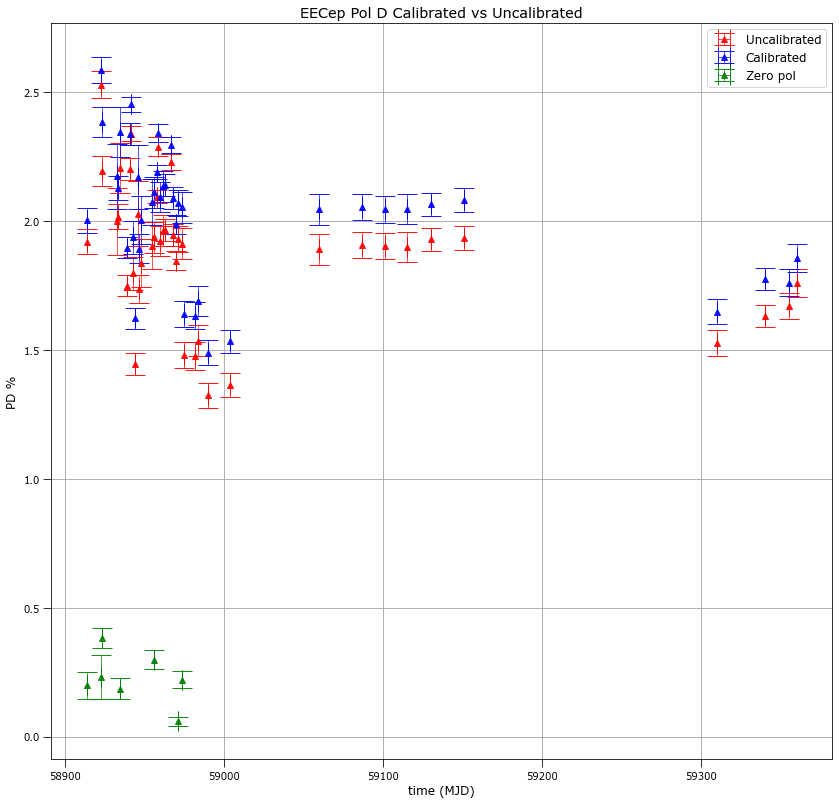

Calculate and plot polarization degree for 3 input types without returning data
Type 1 has length: 41 entries
Type 1 has length: 41 entries
Type 1 has length: 23 entries


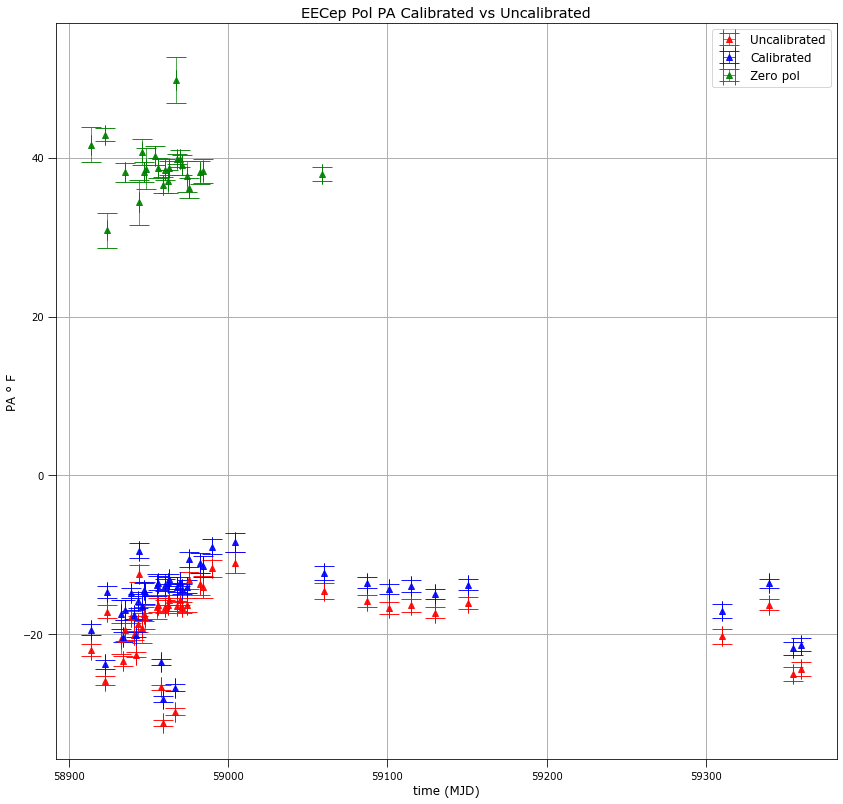

In [59]:
#Target EECep
funcs_polarimetry.calc_pd2([np.array(data_EECep), 
                            np.array(cal_prod_EECep),
                            np.array(data_g191)],
                           plot_legend=['Uncalibrated', 'Calibrated', 'Zero pol'],
                           plot_title='EECep Pol D Calibrated vs Uncalibrated',  
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

funcs_polarimetry.calc_pa2([np.array(data_EECep), 
                            np.array(cal_prod_EECep),
                            np.array(data_hd2158)],
                           plot_legend=['Uncalibrated', 'Calibrated', 'Zero pol'],
                           plot_title='EECep Pol PA Calibrated vs Uncalibrated', 
                           deg_arg=True, 
                           verbose_calc_pa=False,
                           verbose_data=False)

Calculate and plot polarization degree for 2 input types without returning data
Type 1 has length: 23 entries
Type 1 has length: 23 entries


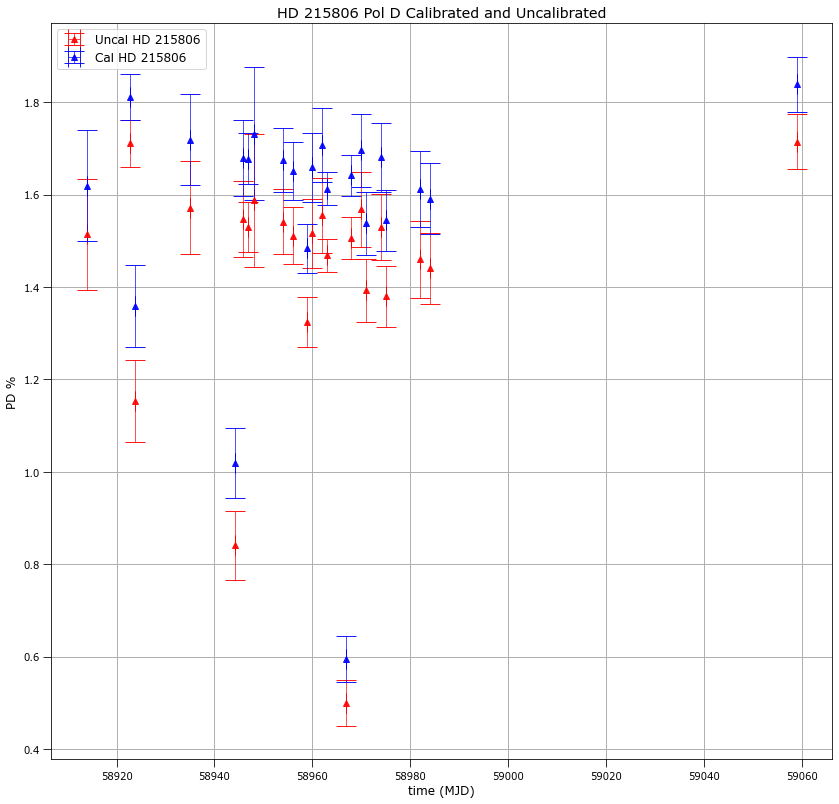

Calculate and plot polarization degree for 2 input types without returning data
Type 1 has length: 23 entries
Type 1 has length: 23 entries


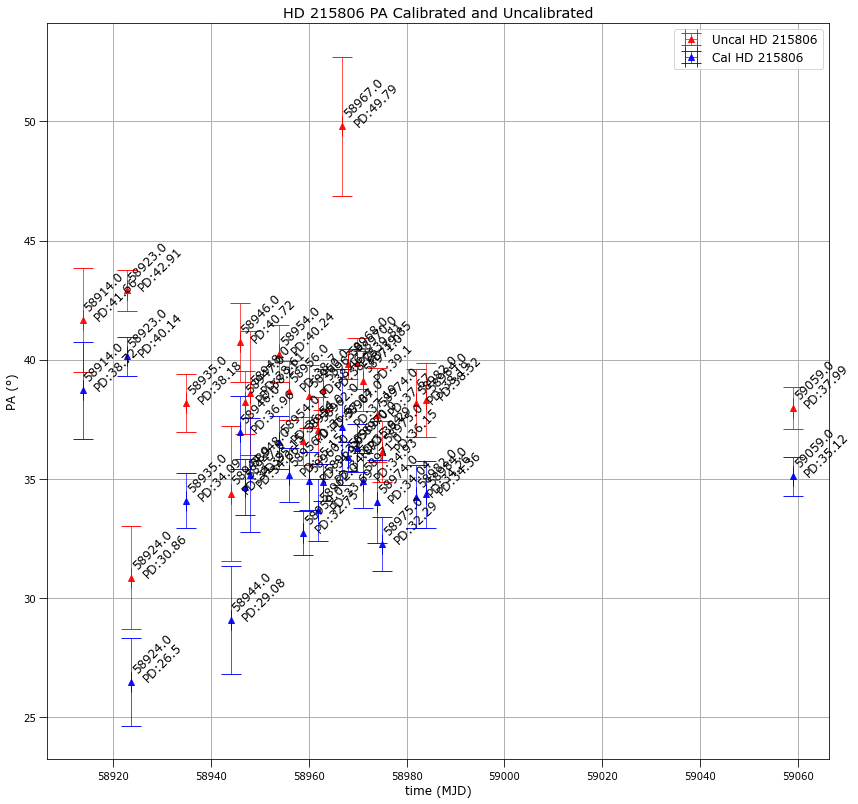

In [64]:
#High Pol HD2158
funcs_polarimetry.calc_pd2([np.array(data_hd2158), 
                            np.array(cal_prod_hd2158)],
                           plot_legend=['Uncal HD 215806', 'Cal HD 215806'],
                           plot_title='HD 215806 Pol D Calibrated and Uncalibrated',  
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

funcs_polarimetry.calc_pa2([np.array(data_hd2158), 
                            np.array(cal_prod_hd2158)], 
                            plot_legend=['Uncal HD 215806', 'Cal HD 215806'],
                            plot_title='HD 215806 PA Calibrated and Uncalibrated', 
                            deg_arg=True, 
                            verbose_calc_pa=False,
                            verbose_data=True)

Calculate and plot polarization degree for 2 input types without returning data
Type 1 has length: 14 entries
Type 1 has length: 14 entries


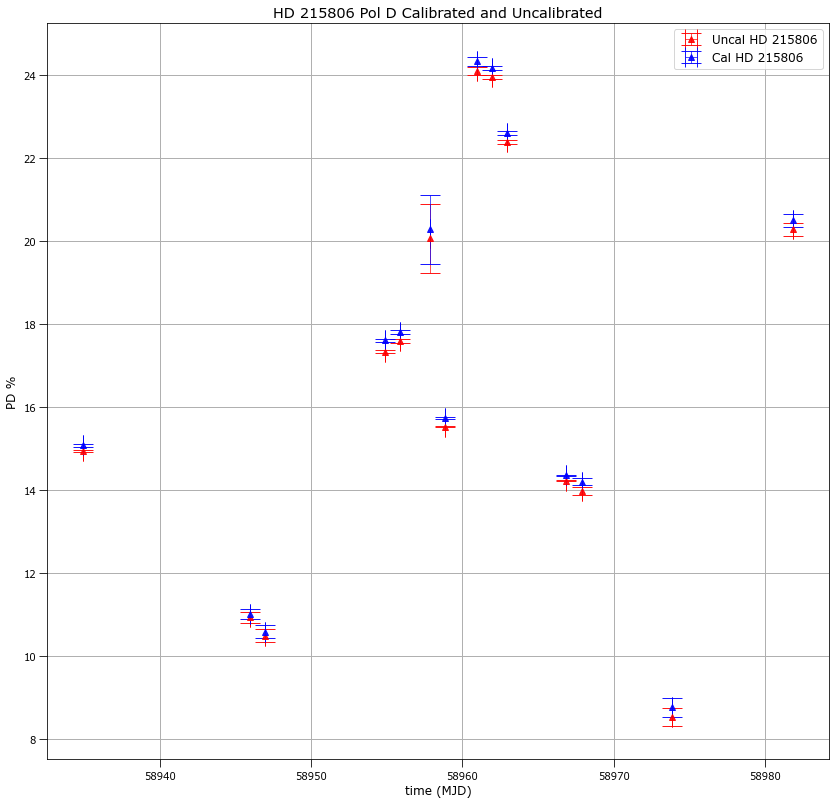

Calculate and plot polarization degree for 2 input types without returning data
Type 1 has length: 14 entries
Type 1 has length: 14 entries


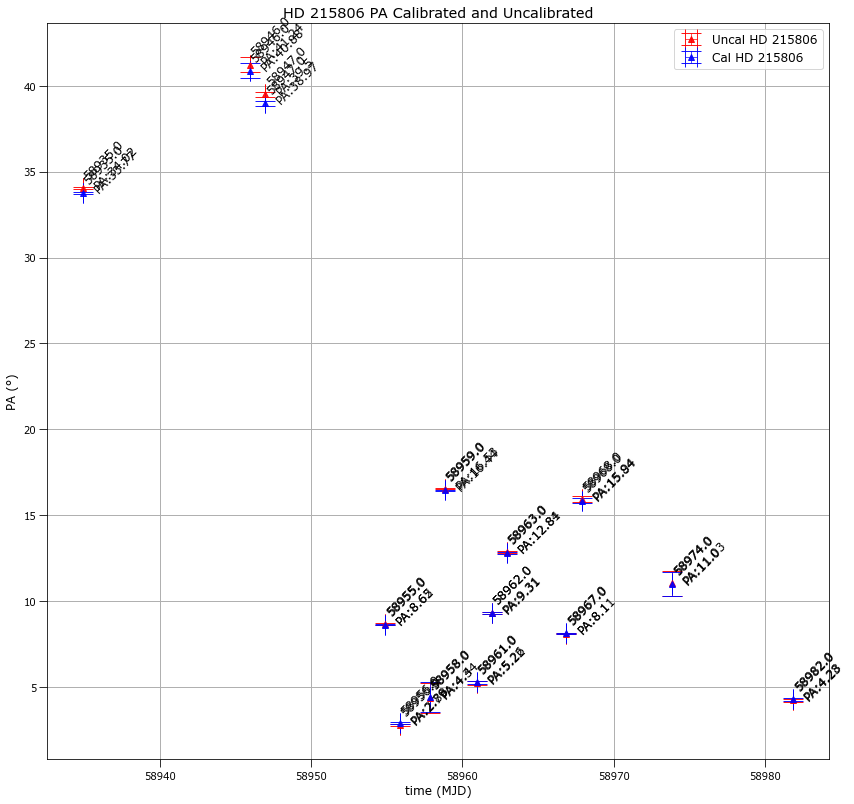

In [74]:
#High Pol HD2158
funcs_polarimetry.calc_pd2([np.array(data_oj287), 
                            np.array(cal_prod_oj287)],
                           plot_legend=['Uncal HD 215806', 'Cal HD 215806'],
                           plot_title='HD 215806 Pol D Calibrated and Uncalibrated',  
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

funcs_polarimetry.calc_pa2([np.array(data_oj287), 
                            np.array(cal_prod_oj287)], 
                            plot_legend=['Uncal HD 215806', 'Cal HD 215806'],
                            plot_title='HD 215806 PA Calibrated and Uncalibrated', 
                            deg_arg=True, 
                            verbose_calc_pa=False,
                            verbose_data=True)

In [66]:
#Unalibrated
data_PD_eecep = funcs_polarimetry.calc_PD_stability(data_EECep, 
                                           perc_arg=True)

data_PA_eecep  = funcs_polarimetry.calc_PA_stability(data_EECep,
                                           deg_arg=True)

data_PD_HD21 = funcs_polarimetry.calc_PD_stability(data_hd2158, 
                                           perc_arg=True)

data_PA_HD21 = funcs_polarimetry.calc_PA_stability(data_hd2158, 
                                           deg_arg=True)

#Calibrated
data_cal_PD_eecep = funcs_polarimetry.calc_PD_stability(cal_prod_EECep, 
                                           perc_arg=True)

data_cal_PA_eecep  = funcs_polarimetry.calc_PA_stability(cal_prod_EECep,
                                           deg_arg=True)

data_cal_PD_HD21 = funcs_polarimetry.calc_PD_stability(cal_prod_hd2158, 
                                           perc_arg=True)

data_cal_PA_HD21 = funcs_polarimetry.calc_PA_stability(cal_prod_hd2158, 
                                           deg_arg=True)

Calculate and return polarization degree (PD) for duration 2020-03-05 19:32:15.755000 to 2021-05-25 23:41:08.920000 
for eecep
Calculate and return position angle (PA) for duration 2020-03-05 19:32:15.755000 to 2021-05-25 23:41:08.920000 
for eecep
Calculate and return polarization degree (PD) for duration 2020-03-05 20:54:11.400000 to 2020-07-29 00:21:11.230000 
for hd215806
Calculate and return position angle (PA) for duration 2020-03-05 20:54:11.400000 to 2020-07-29 00:21:11.230000 
for hd215806


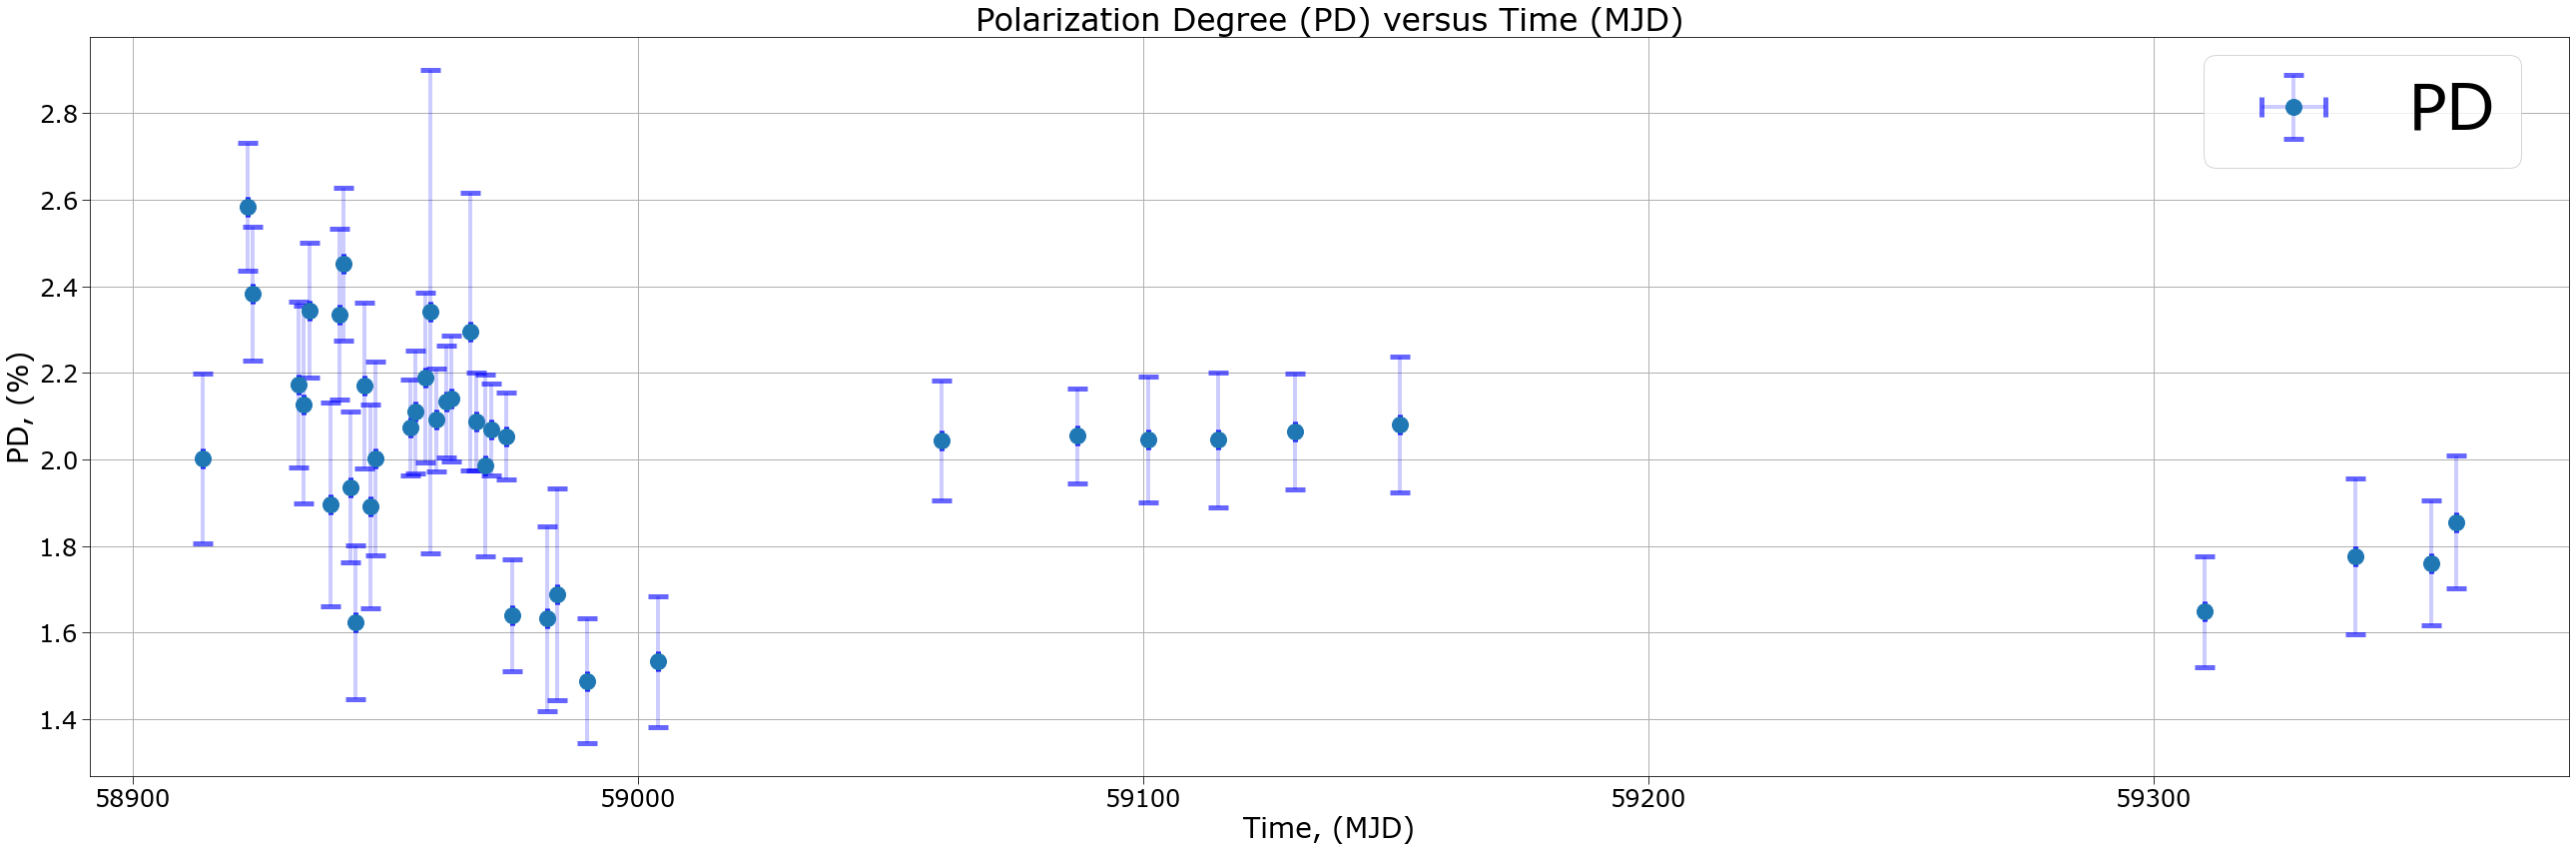

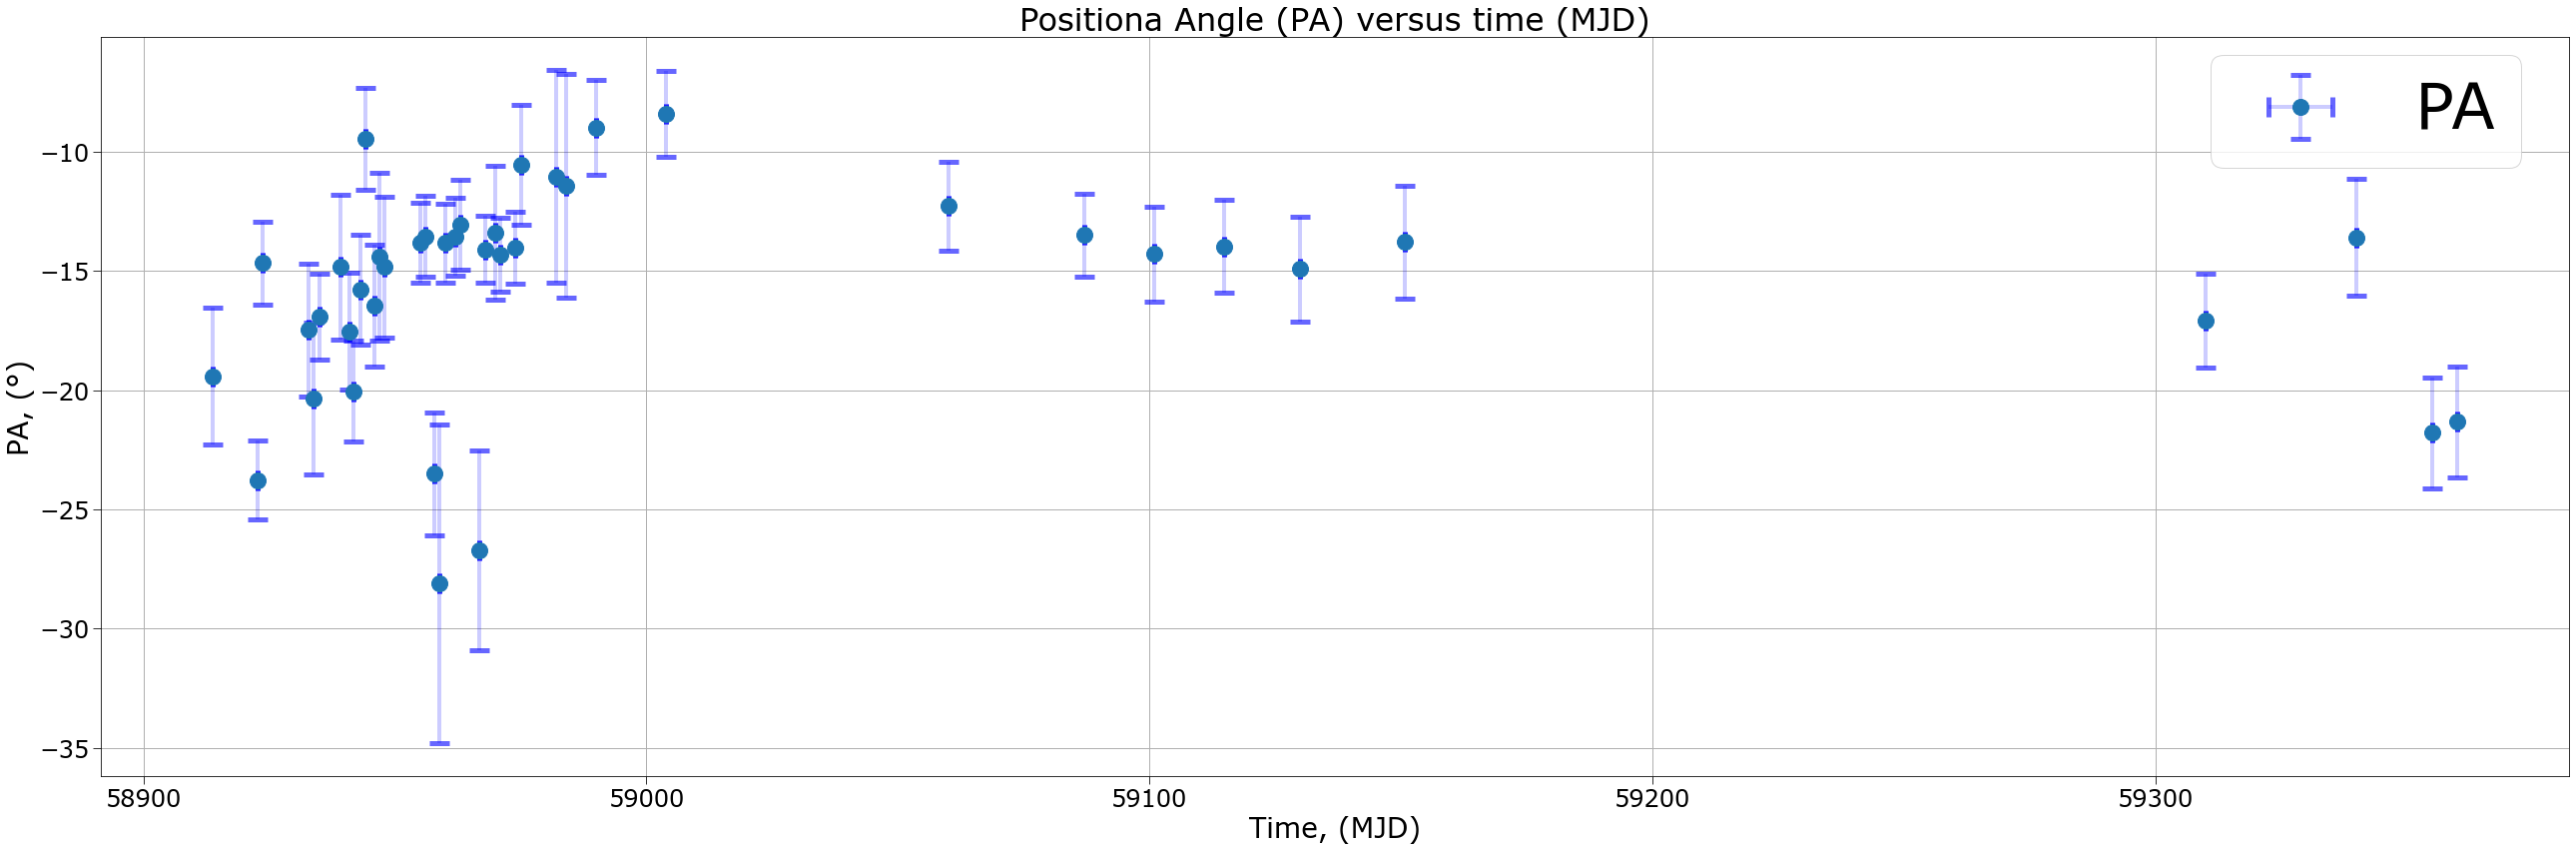

In [39]:
funcs_polarimetry.plot_pol_stab(data_cal_PD_eecep[2], data_cal_PD_eecep[0], data_cal_PD_eecep[1], plot_data='PD', toggle=False)
funcs_polarimetry.plot_pol_stab(data_cal_PA_eecep[2], data_cal_PA_eecep[0], data_cal_PA_eecep[1], plot_data='PA')

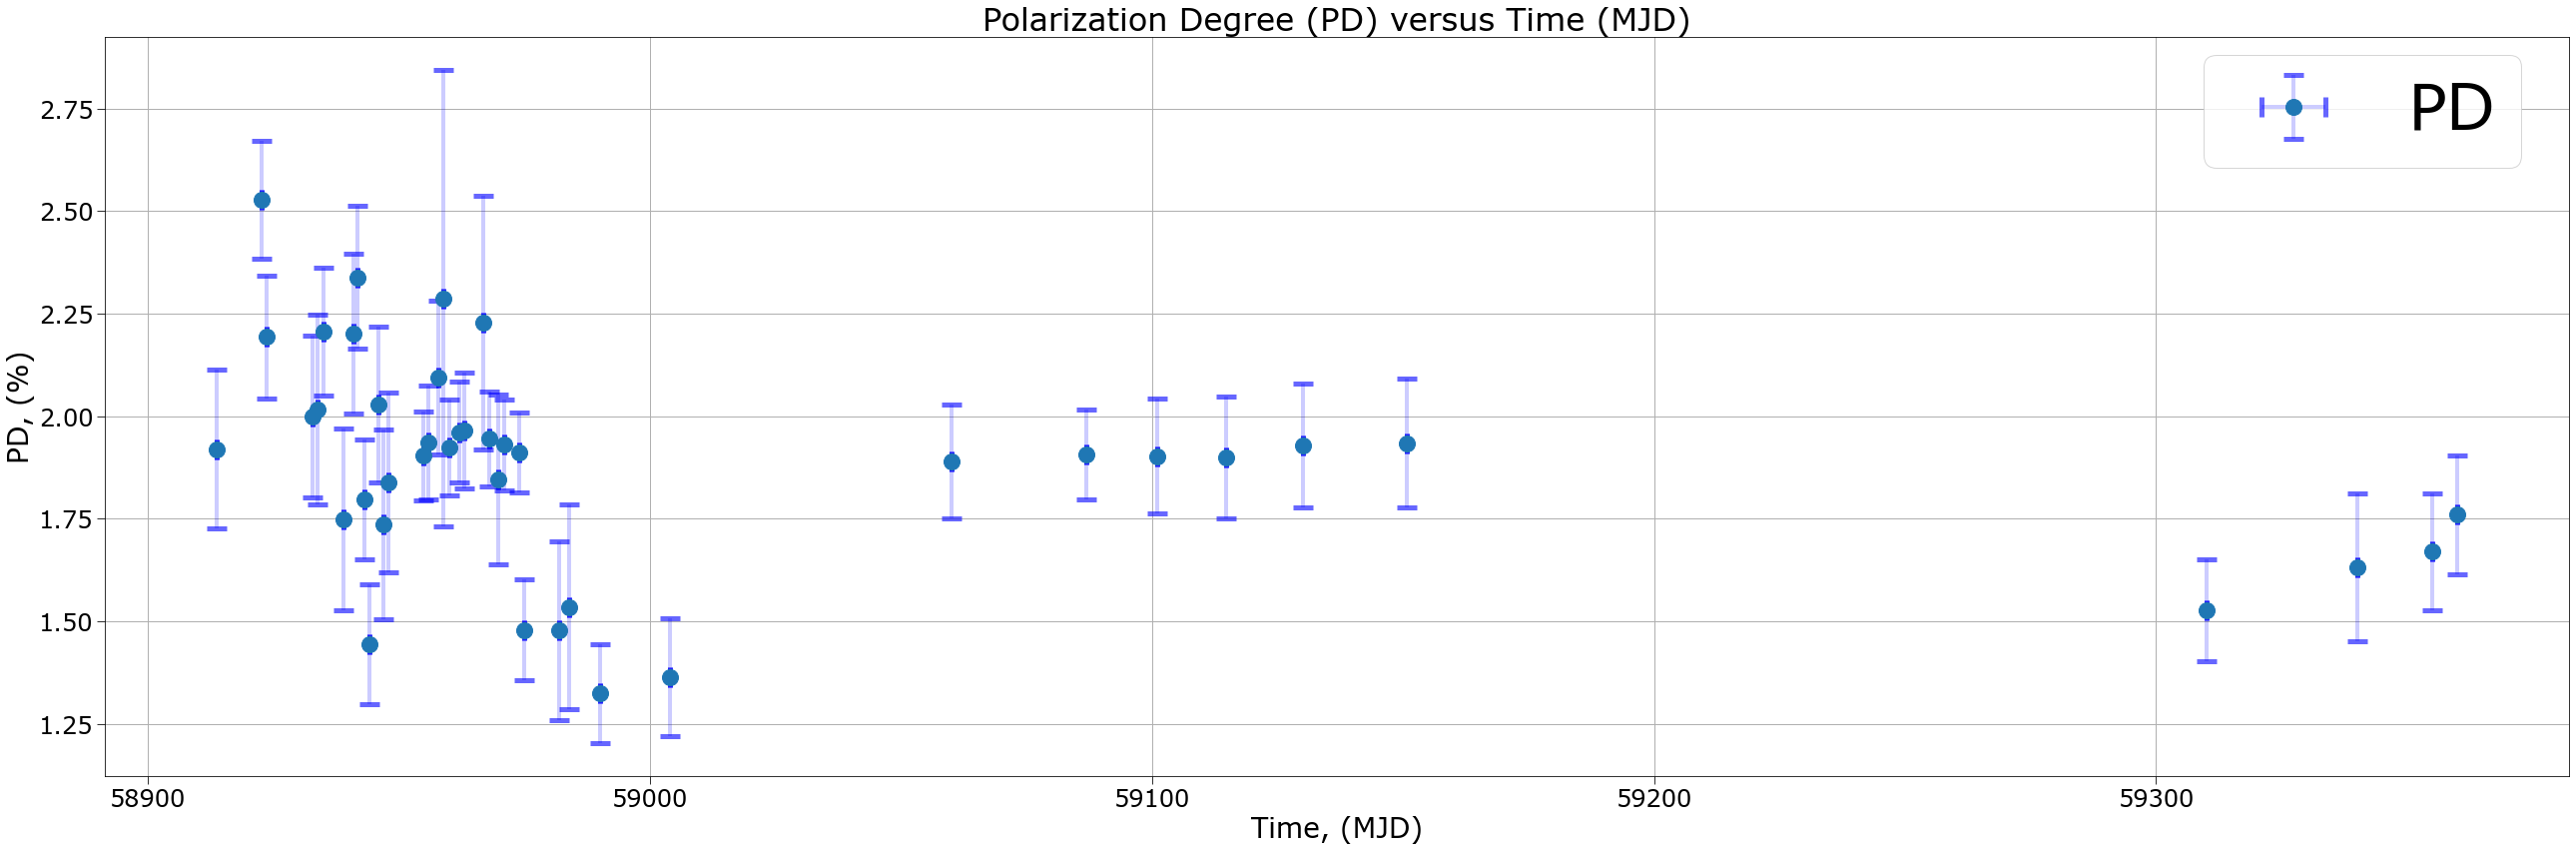

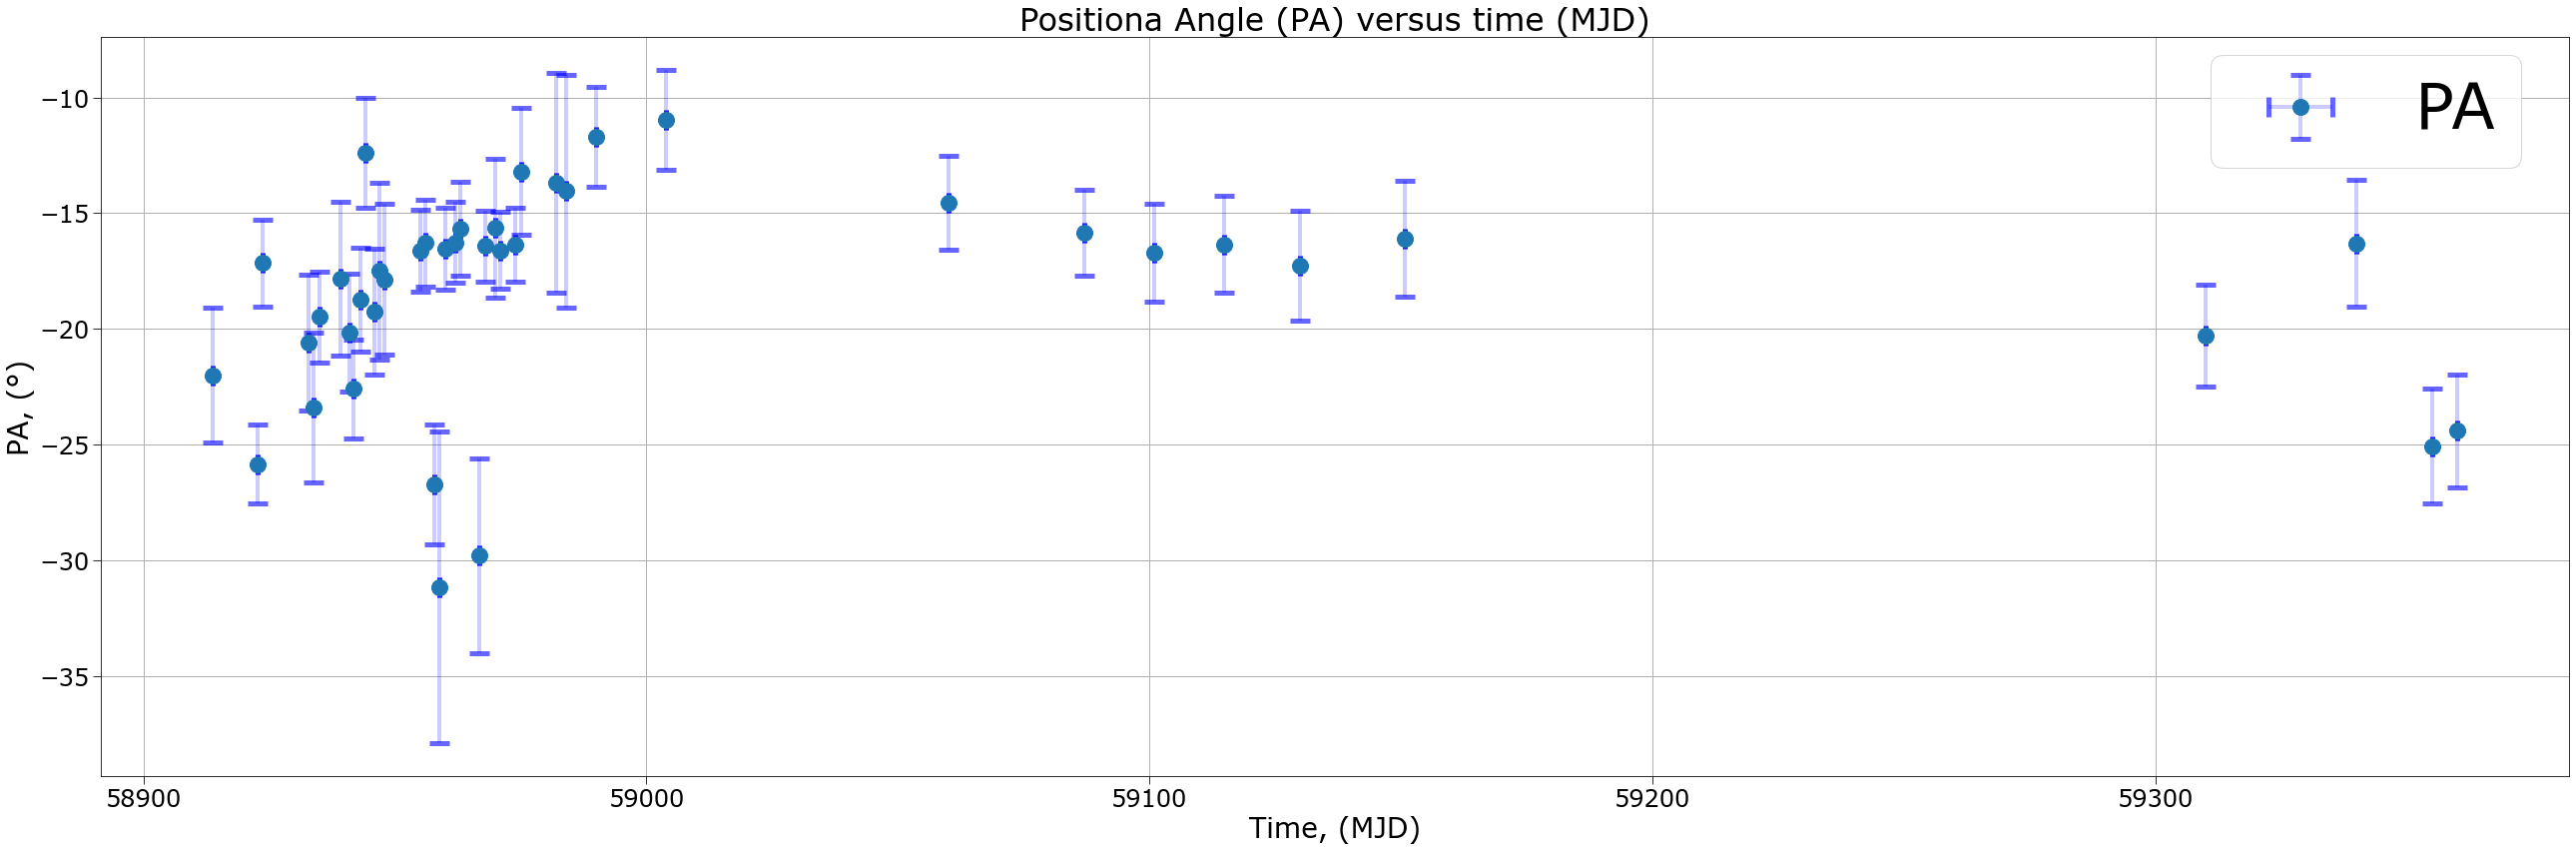

In [70]:
funcs_polarimetry.plot_pol_stab(data_PD_eecep[2], data_PD_eecep[0], data_PD_eecep[1], plot_data='PD', toggle=False)
funcs_polarimetry.plot_pol_stab(data_PA_eecep[2], data_PA_eecep[0], data_PA_eecep[1], plot_data='PA')

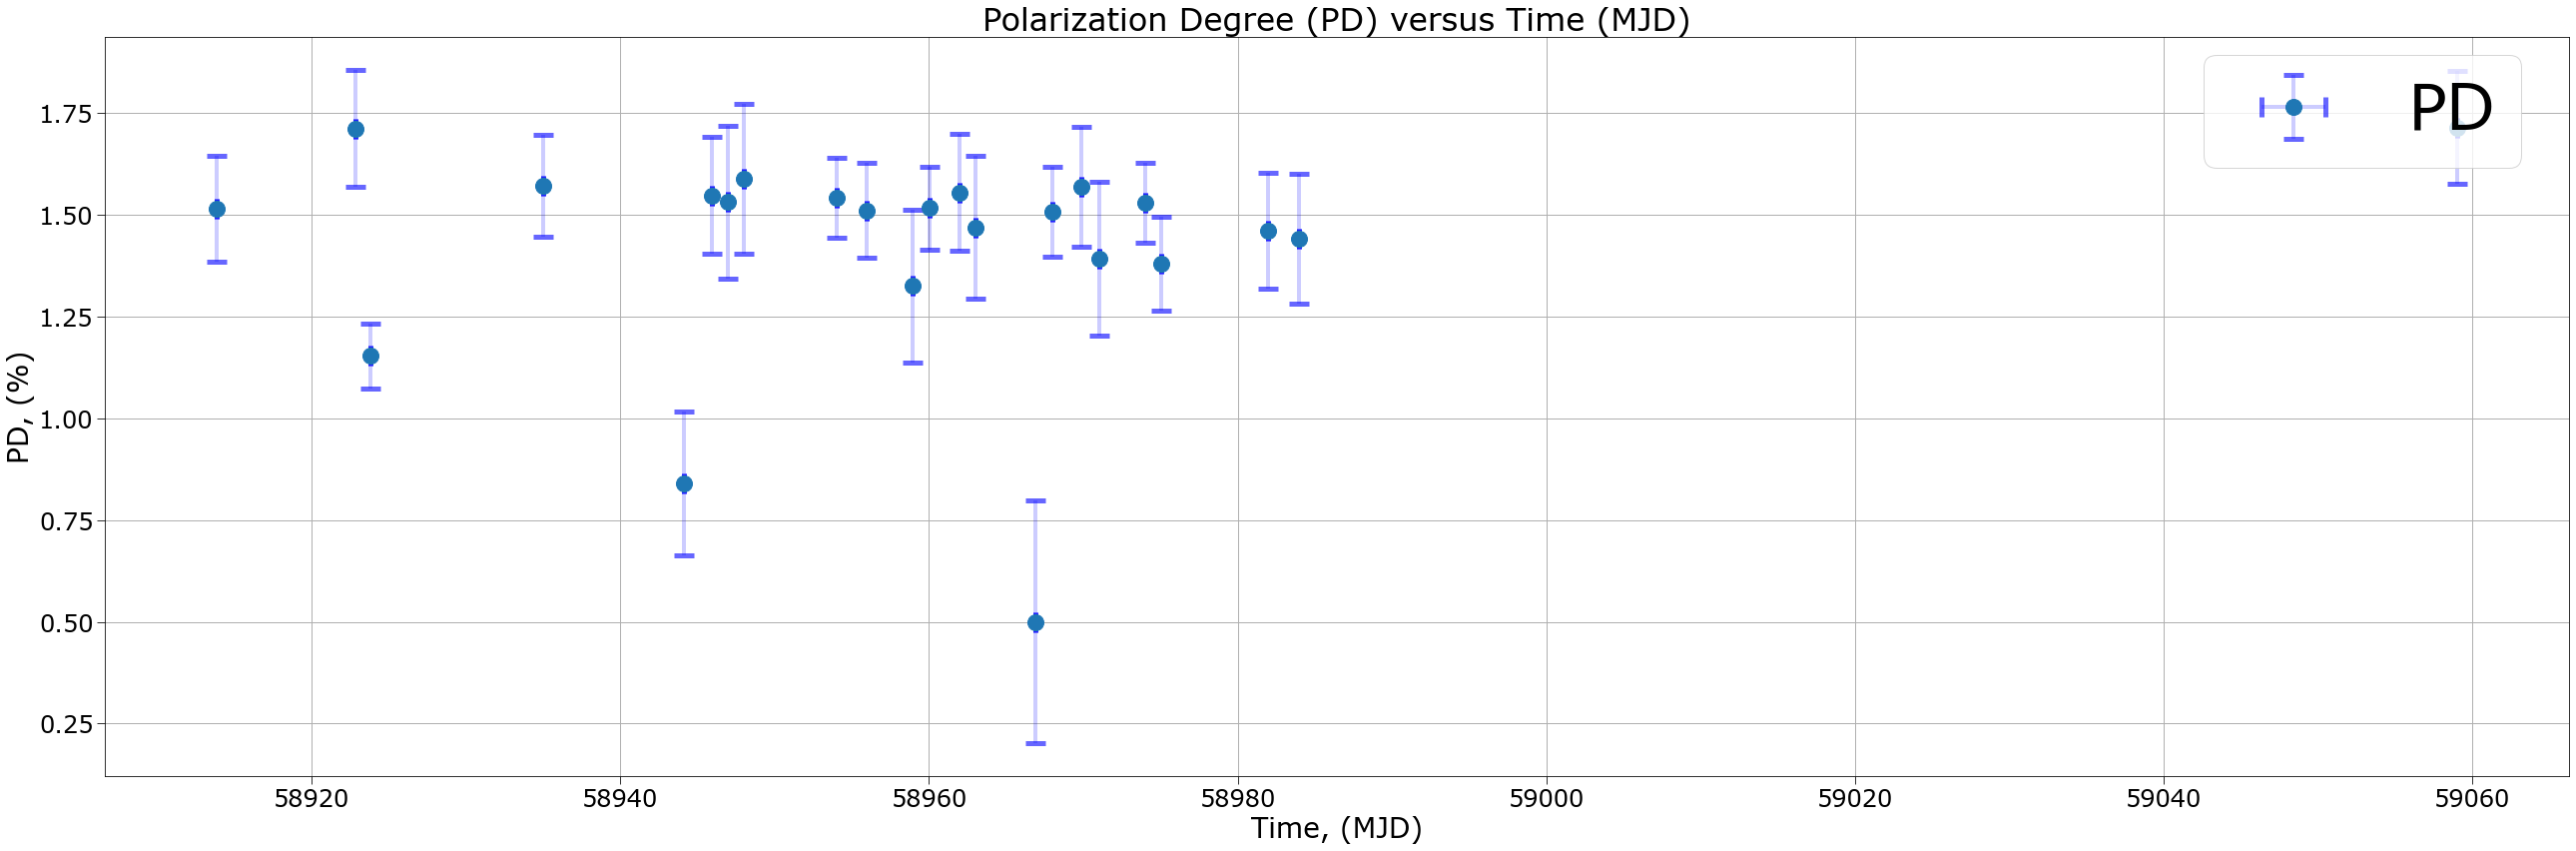

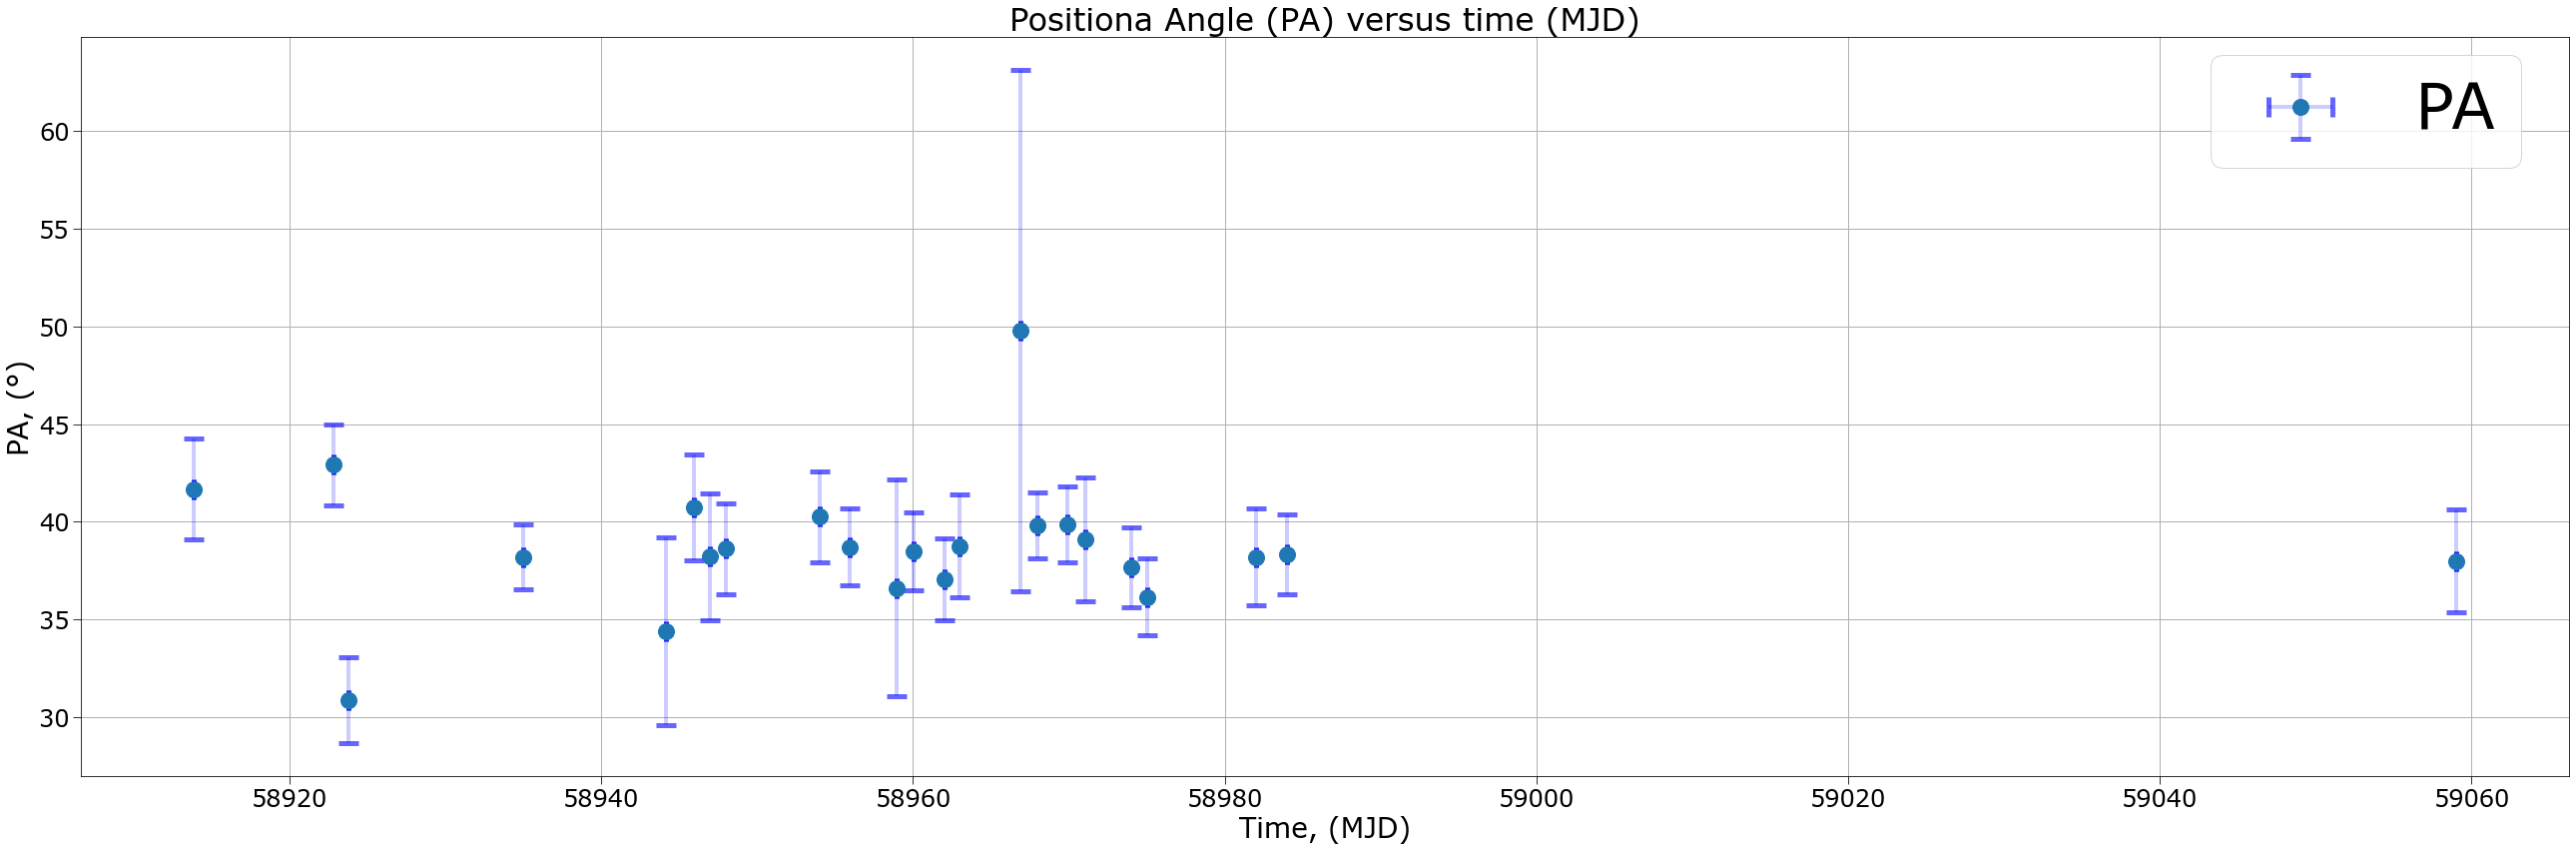

In [71]:
funcs_polarimetry.plot_pol_stab(data_PD_HD21[2], data_PD_HD21[0], data_PD_HD21[1], plot_data='PD')
funcs_polarimetry.plot_pol_stab(data_PA_HD21[2], data_PA_HD21[0], data_PA_HD21[1], plot_data='PA')

In [ ]:
#you will have an artefact called "calibrated data" and you will feed these to the same plot tools

In [190]:
#data_PD_eecep
#data_PD_eecep[2]

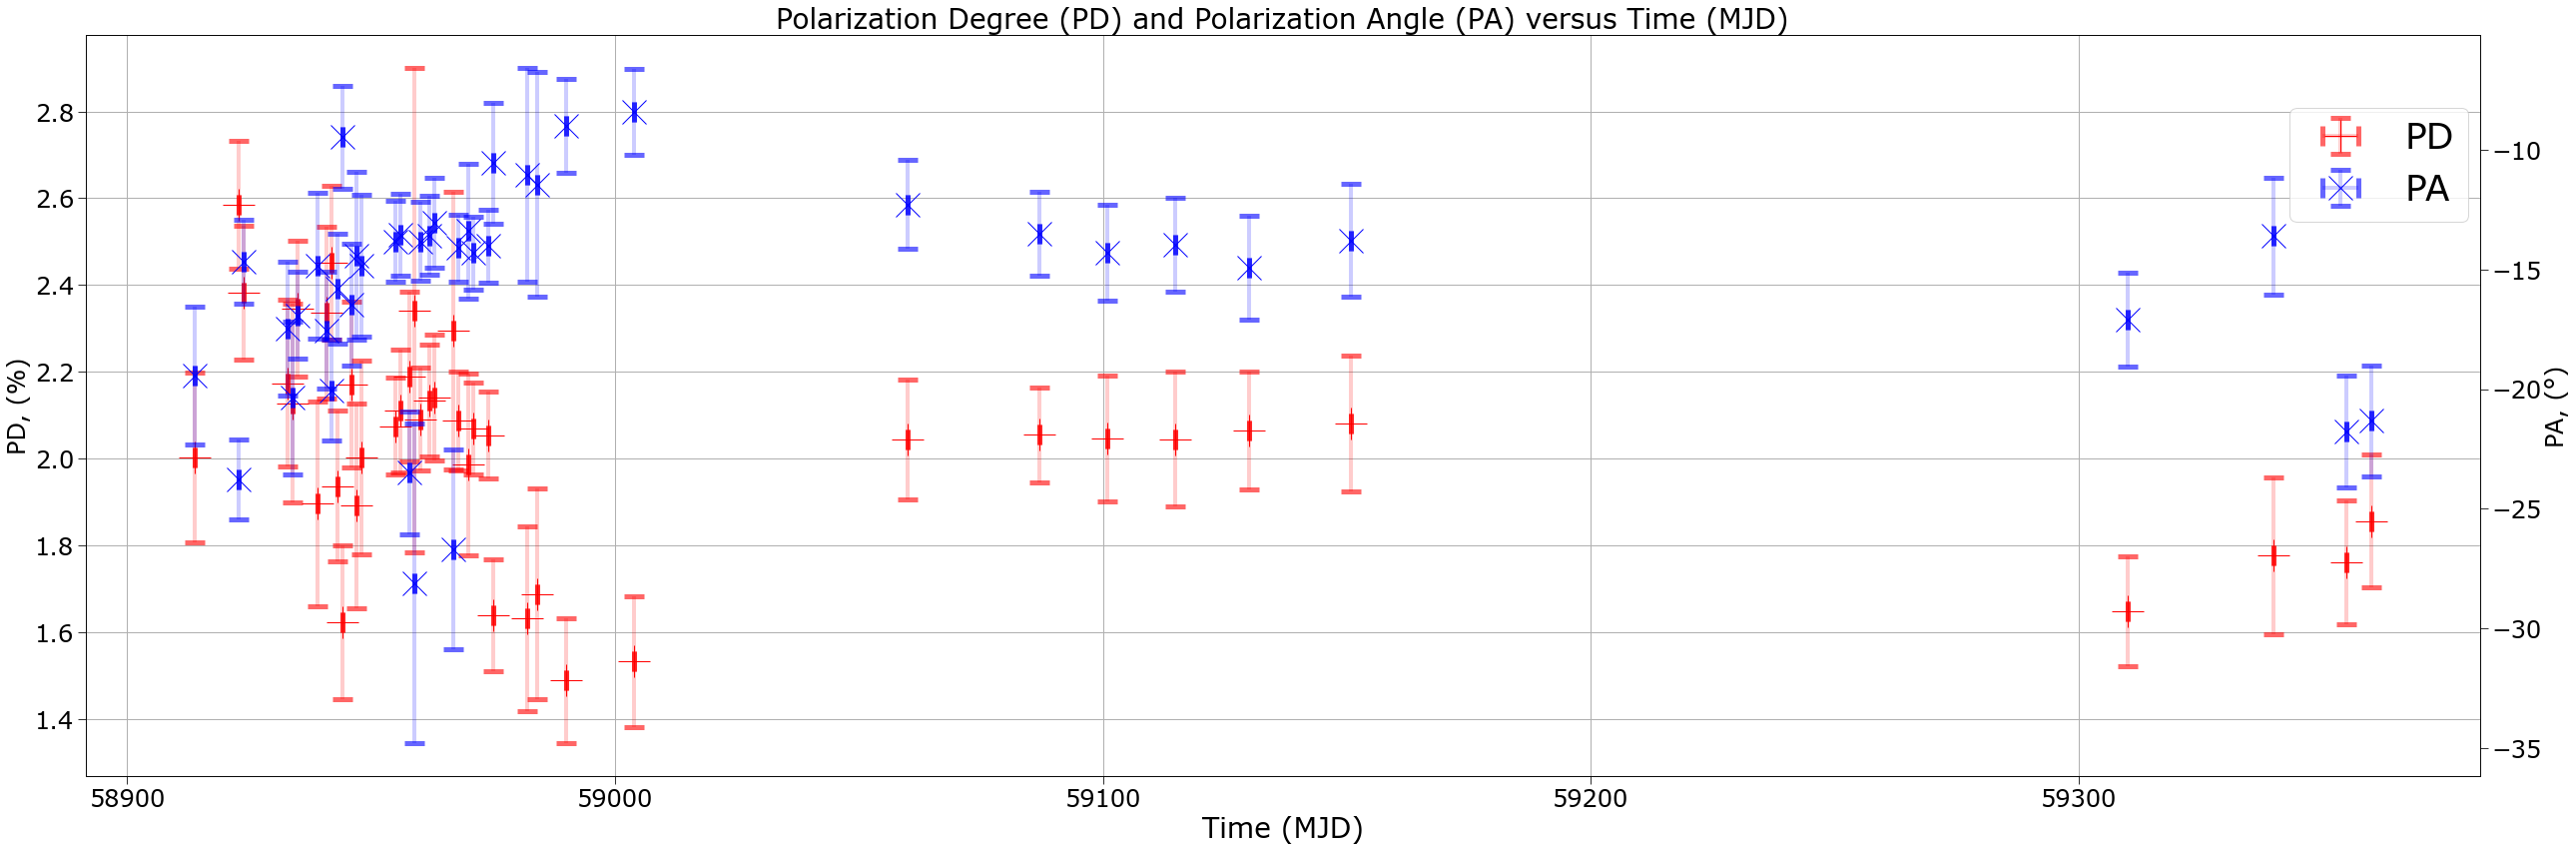

In [46]:
funcs_polarimetry.plot_pol_stab_PDPA([data_cal_PD_eecep[2], data_cal_PA_eecep[2],
                                 data_cal_PD_eecep[0], data_cal_PA_eecep[0],
                                 data_cal_PD_eecep[1], data_cal_PA_eecep[1]],
                                ['+', 'x'],
                                ['red', 'blue']
                                )

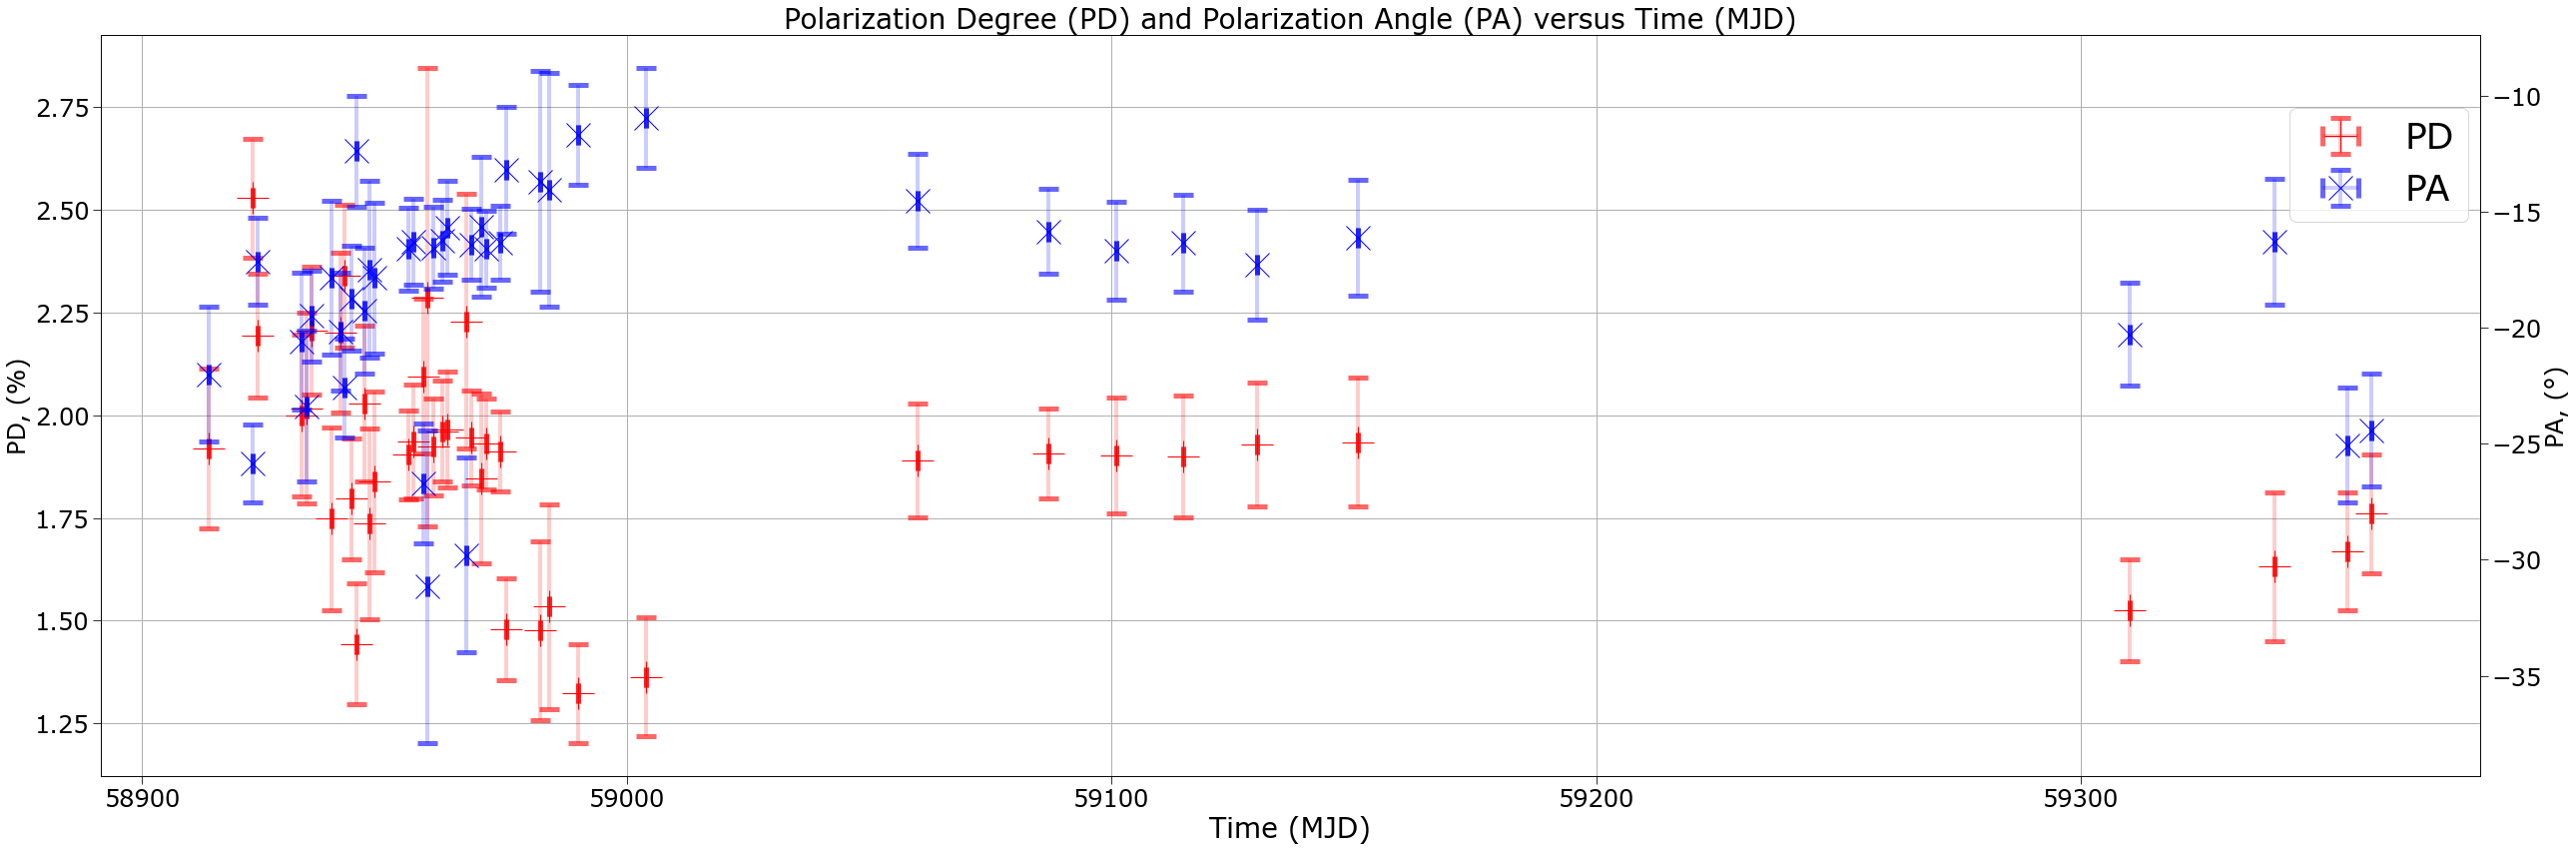

In [72]:
funcs_polarimetry.plot_pol_stab_double([data_PD_eecep[2], data_PA_eecep[2],
                                 data_PD_eecep[0], data_PA_eecep[0],
                                 data_PD_eecep[1], data_PA_eecep[1]],
                                ['+', 'x'],
                                ['red', 'blue']
                                )

Plot q stability


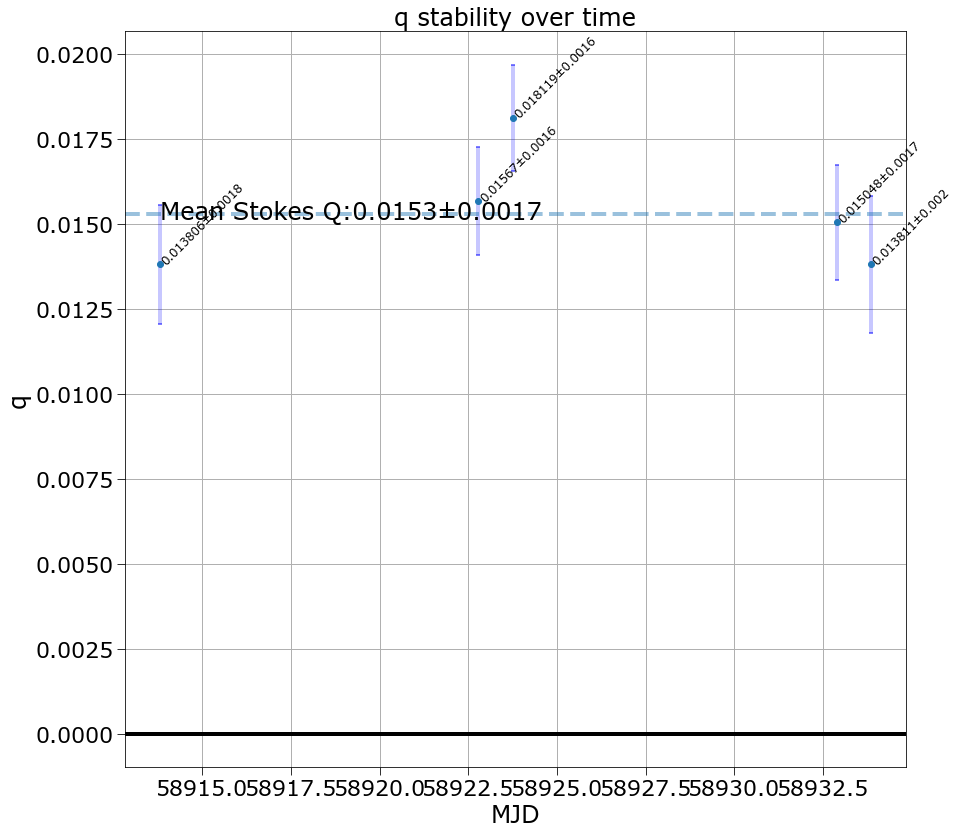

In [224]:
#Cal point is returned via this function
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(np.array(data_EECep)[:,:5], q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)

Plot q stability


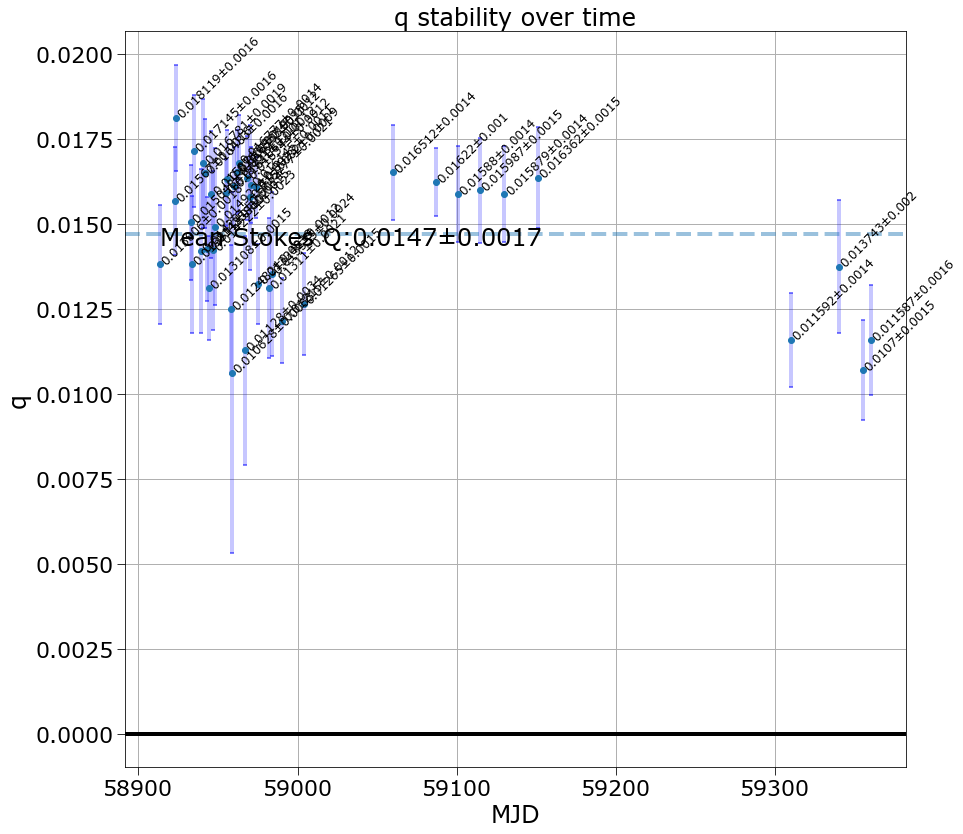

In [79]:
slay = funcs_polarimetry.plot_q_u_stability(data_EECep, q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)

Plot q stability


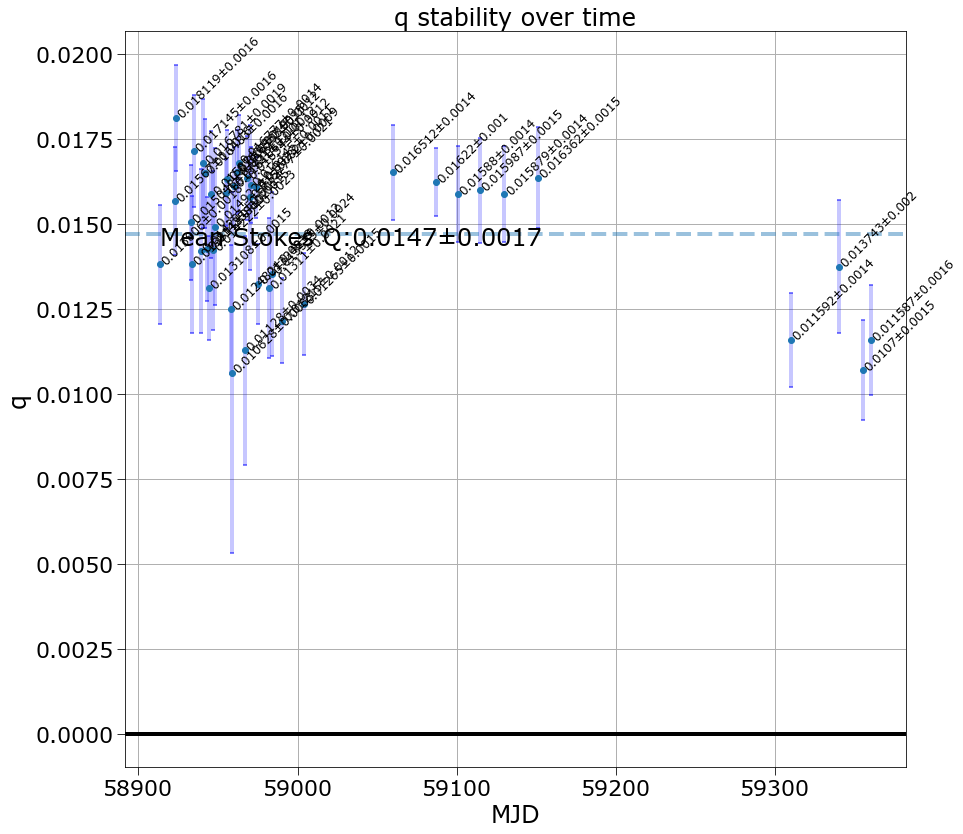

In [76]:
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_EECep, q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)

Plot q stability


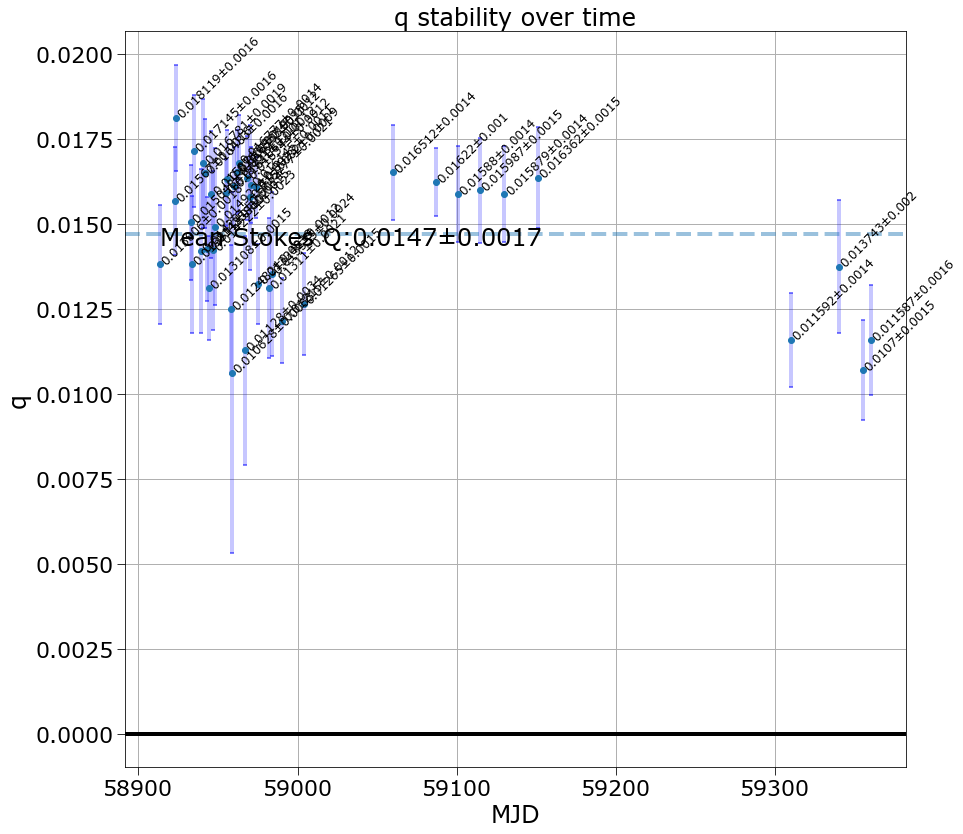

Plot u stability


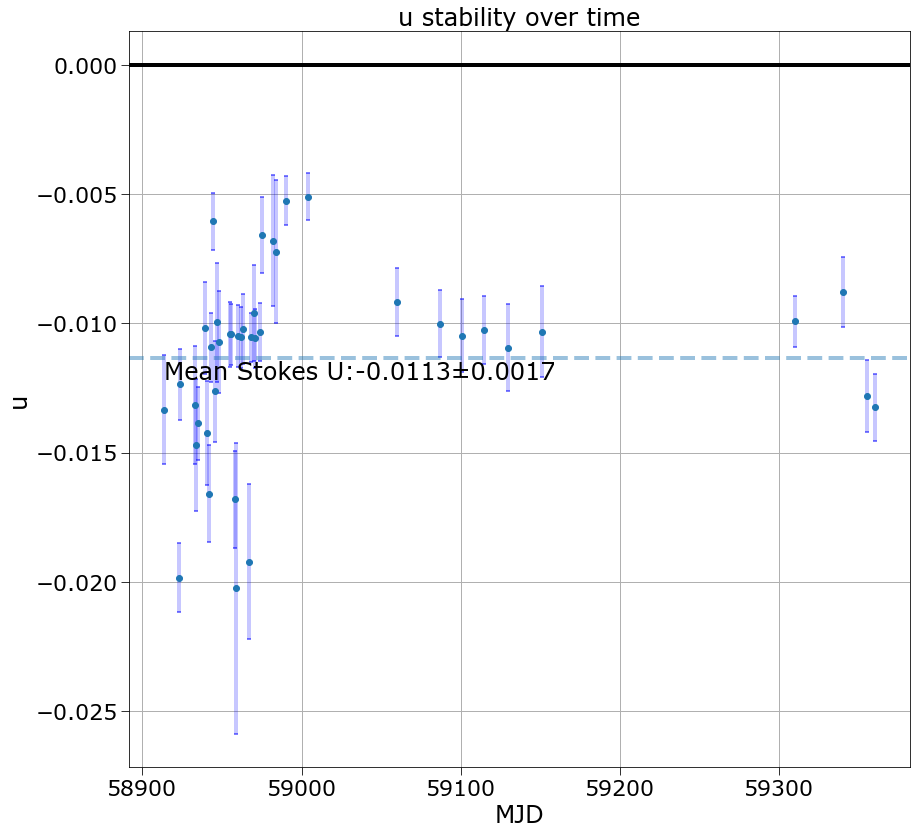

In [75]:
#Cal point is returned via this function
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_EECep, q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)
mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_EECep, q_u_check='u', 
                                                          m_plot=True)

Plot q stability


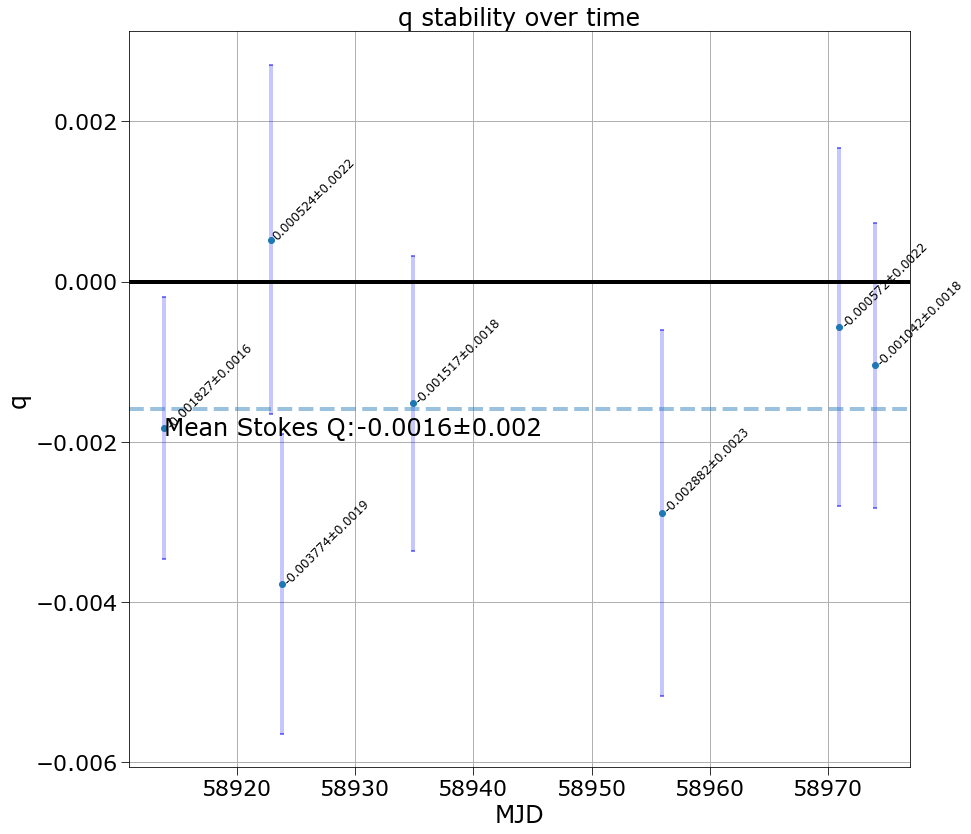

Plot u stability


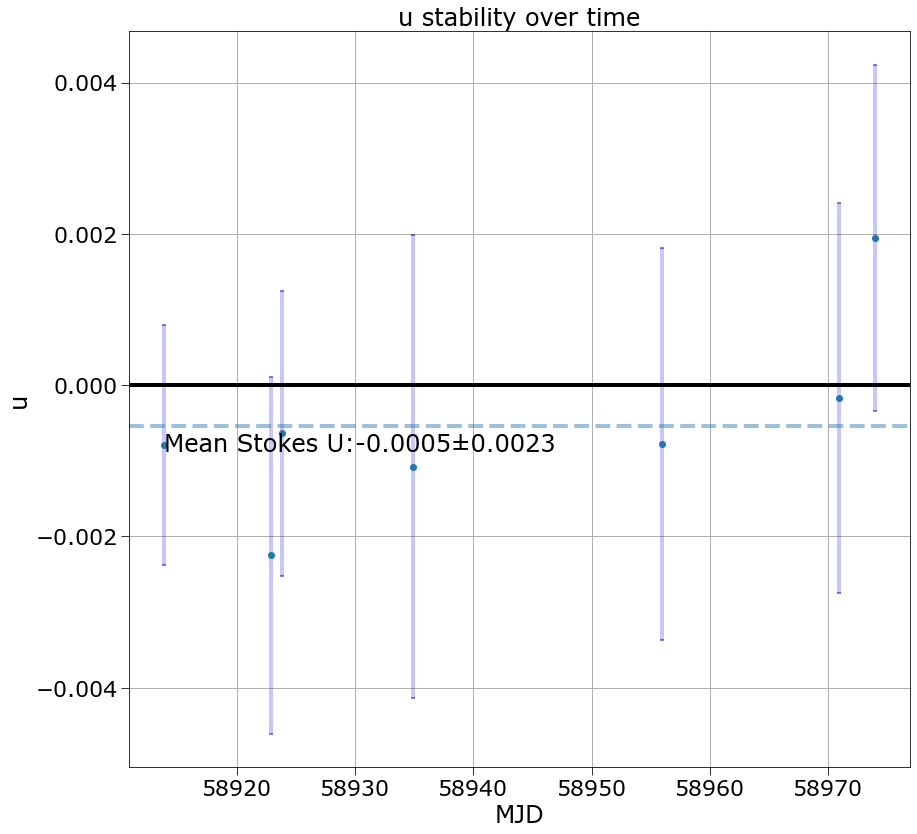

In [74]:
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_g191, q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)
mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_g191, q_u_check='u', 
                                                          m_plot=True)

Plot q stability


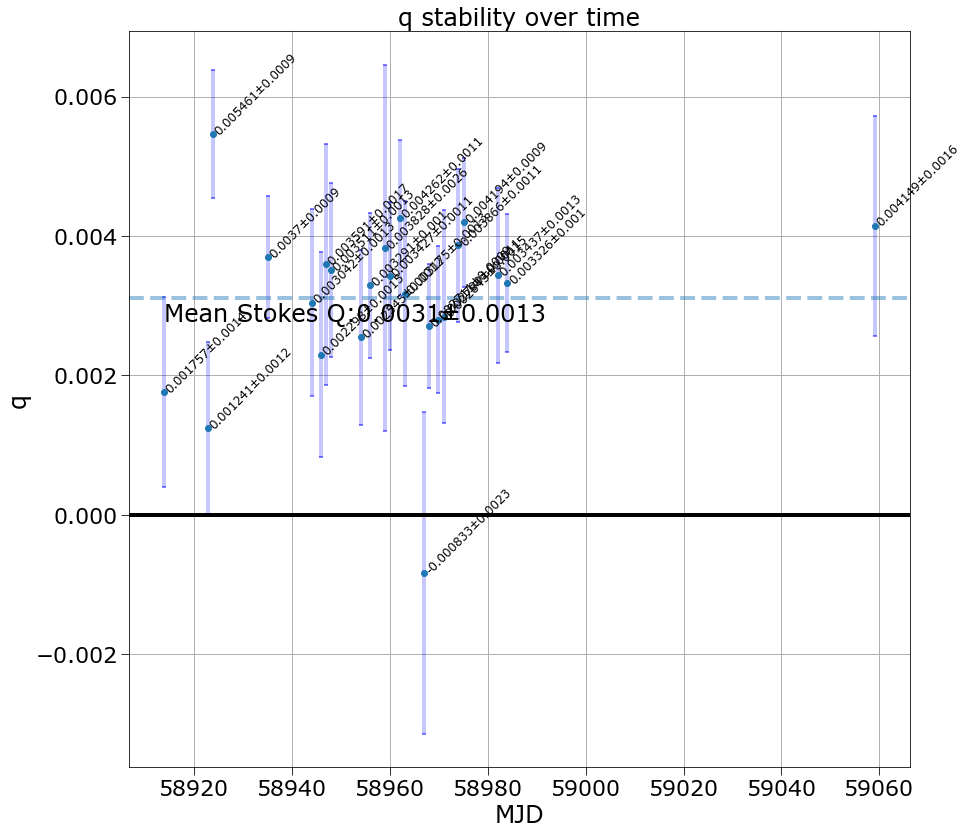

Plot u stability


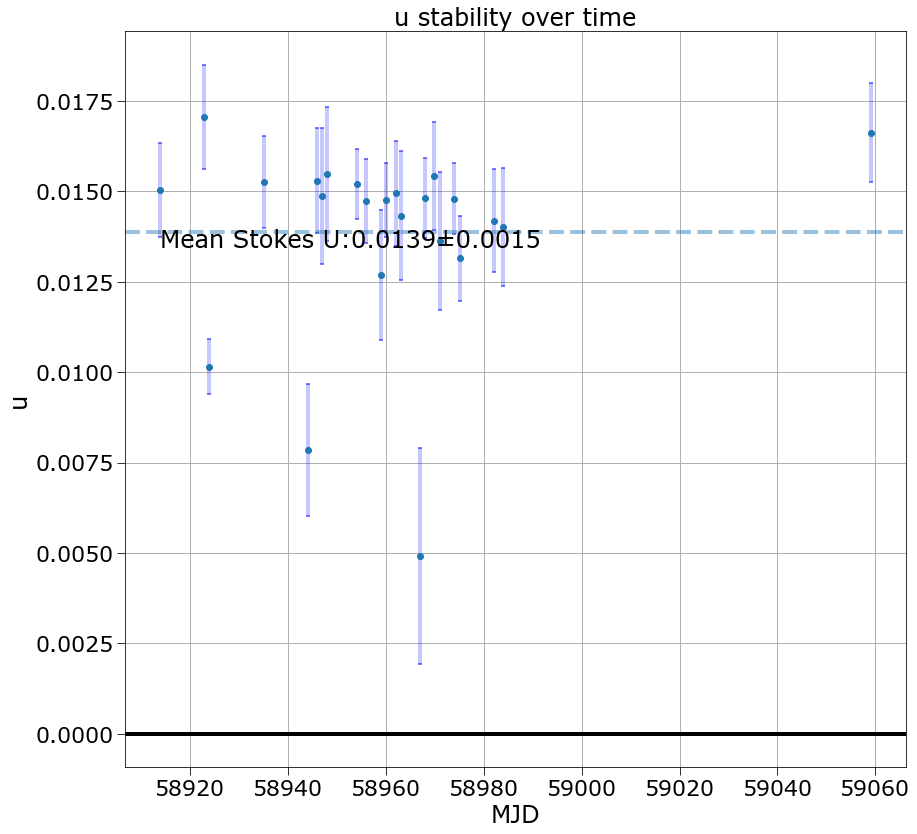

In [91]:
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_hd2158, q_u_check='q', 
                                                          m_plot=True, 
                                                          plot_verbose=True)
mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_hd2158, q_u_check='u', 
                                                          m_plot=True)

In [50]:
#calibrated_data = funcs_polarimetry.calib_data(data_EECep, 
#               ([0.1, 0.001], [0.1,0.001]), 
#               plt_show = False,
#               verbose=False)

In [56]:
#funcs_polarimetry.calib_data(filtered_data, (q_stab[0], q_stab[1] ,u_stab[0], u_stab[1]), False, True) #just work on the artefact
                                                                                                 #Filtered Data

#for zi in range(0, len(zero_pol_data)):
#    q_m, u_m = funcs_polarimetry.mean_q_u_check(filtered_data, zi, "RINGO", True) #Its very small. I'm digging it
#    print(q_m, u_m, "\n")
#plt.scatter(target_qs, target_us, color = 'red', alpha=0.11)
#plt.errorbar(target_qs, target_us, xerr=targ_qstds, yerr=targ_ustds, lw=0.75, fmt="o", color="r", alpha=0.1)
#compare q added in quadrature

#and np.std(q)

#Then you would have learned something and solved todays problem

#Lets calculate Instrumental Polarization

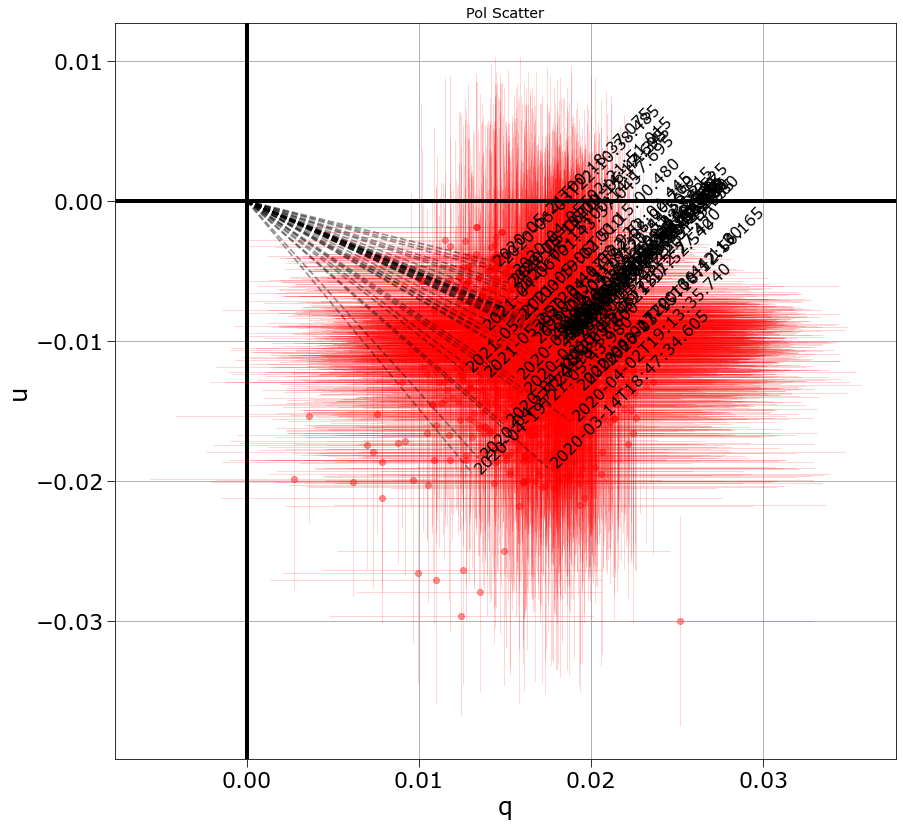

In [58]:
means = funcs_polarimetry.q_n_u_single_plot_v1(cal_prod_EECep, 
                                       plot_c='red',
                                       only_means=False,
                                       pol_deg=True,
                                       retrun_plotelems=True)

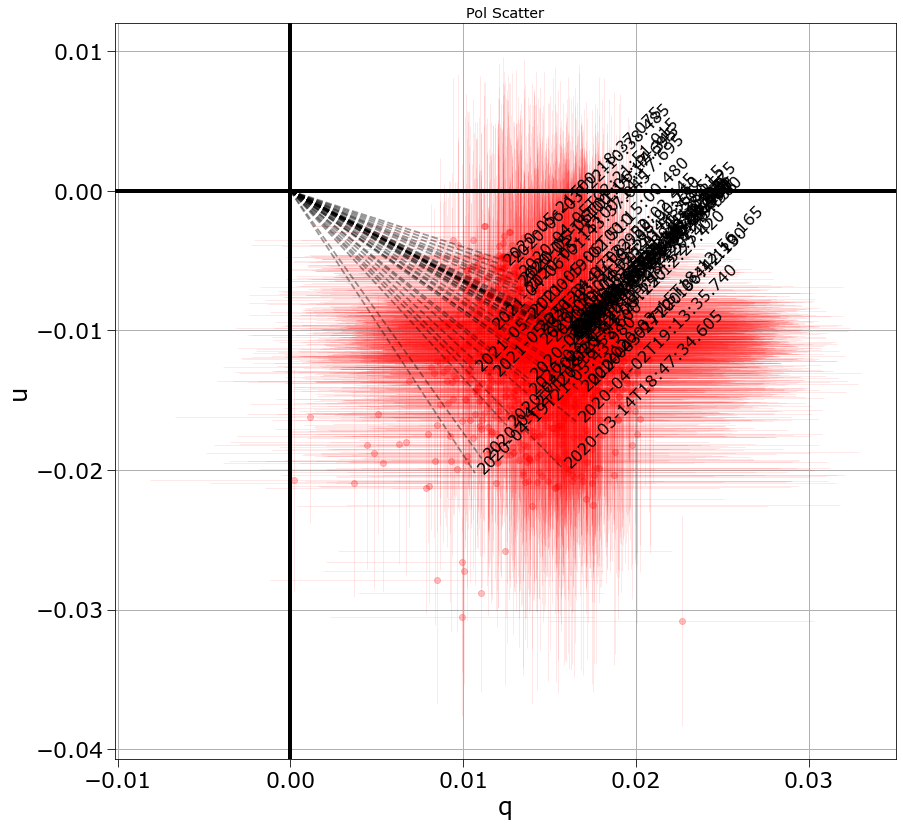

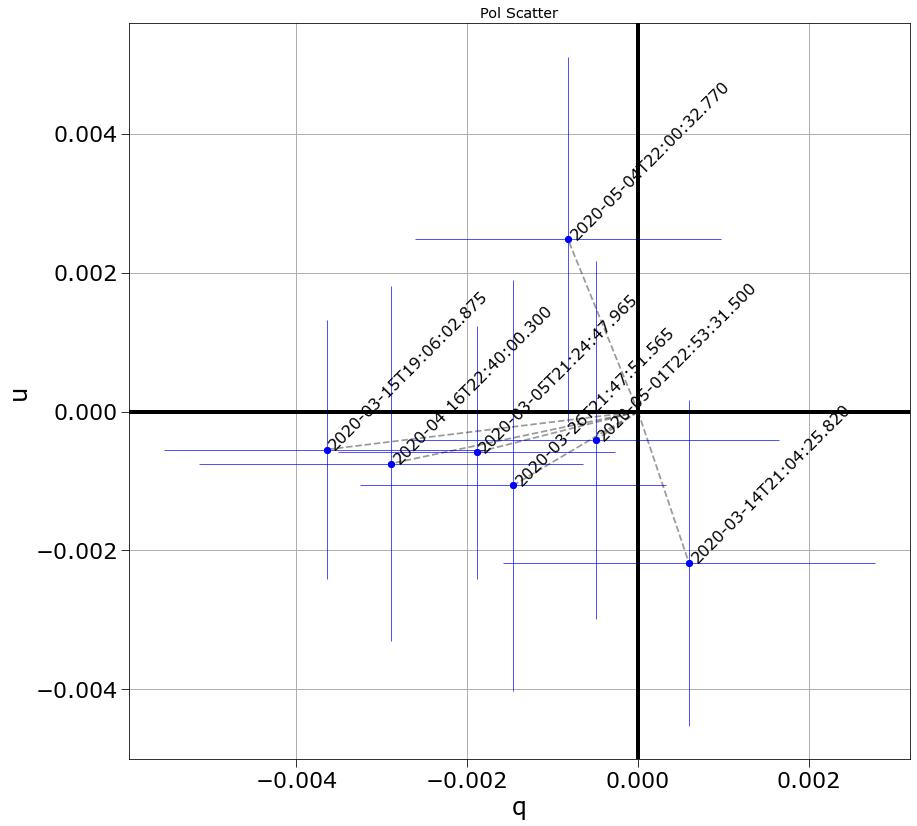

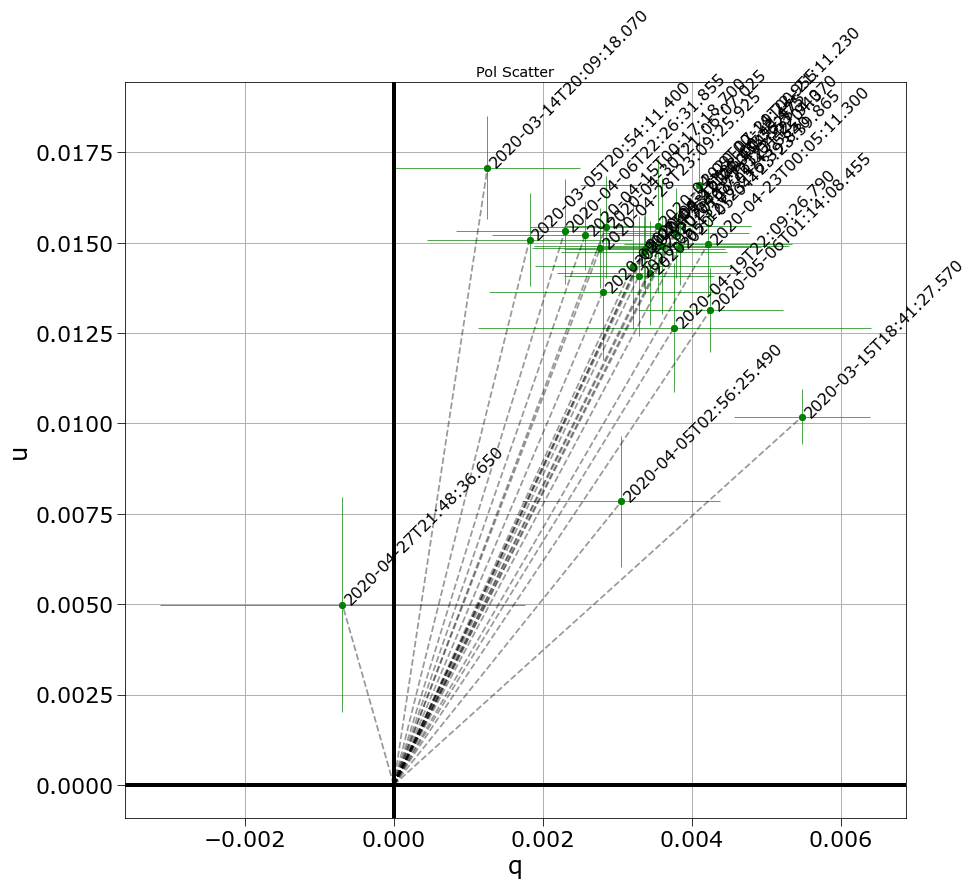

In [346]:
means = funcs_polarimetry.q_n_u_single_plot_v1(data_EECep, 
                                       plot_c='red',
                                       only_means=False,
                                       pol_deg=True,
                                       retrun_plotelems=True)

means = funcs_polarimetry.q_n_u_single_plot_v1(data_g191,
                                       plot_c='blue',
                                       only_means=True,
                                       pol_deg=True)

means = funcs_polarimetry.q_n_u_single_plot_v1(data_hd2158,
                                       plot_c='green',
                                       only_means=True,
                                       pol_deg=True)

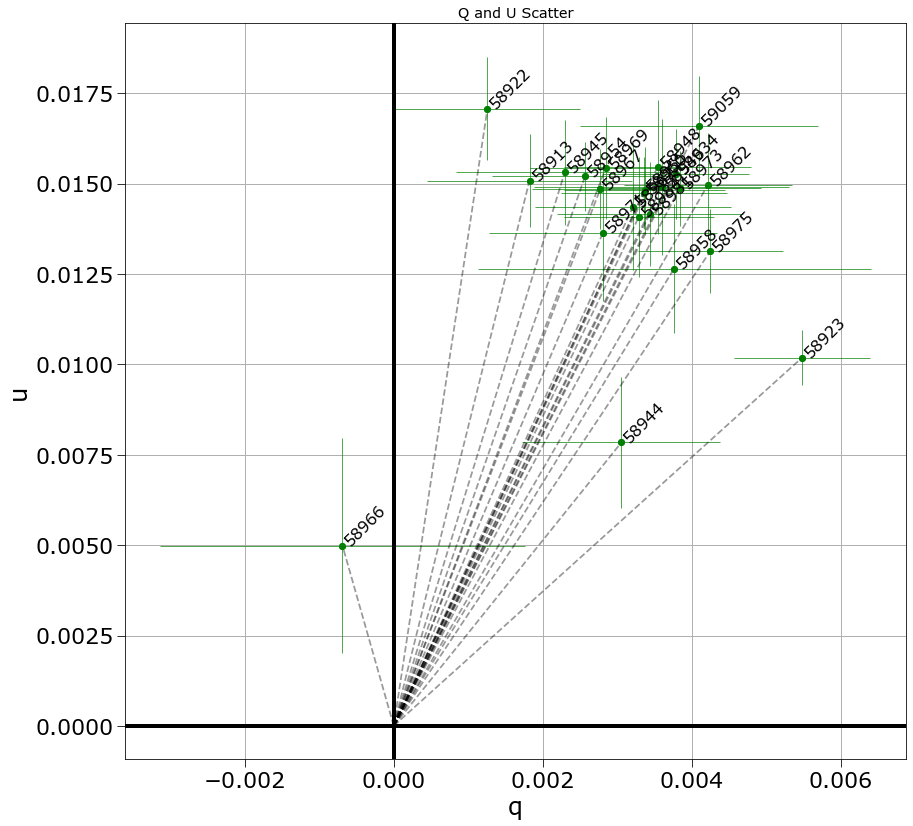

In [26]:
#plot all. remaining is plot all
means = funcs_polarimetry.q_n_u_single_plot_v1(data_hd2158,
                                       plot_c='green',
                                       verbose_MJD_arg=True,
                                       only_means=True,
                                       pol_deg=True)

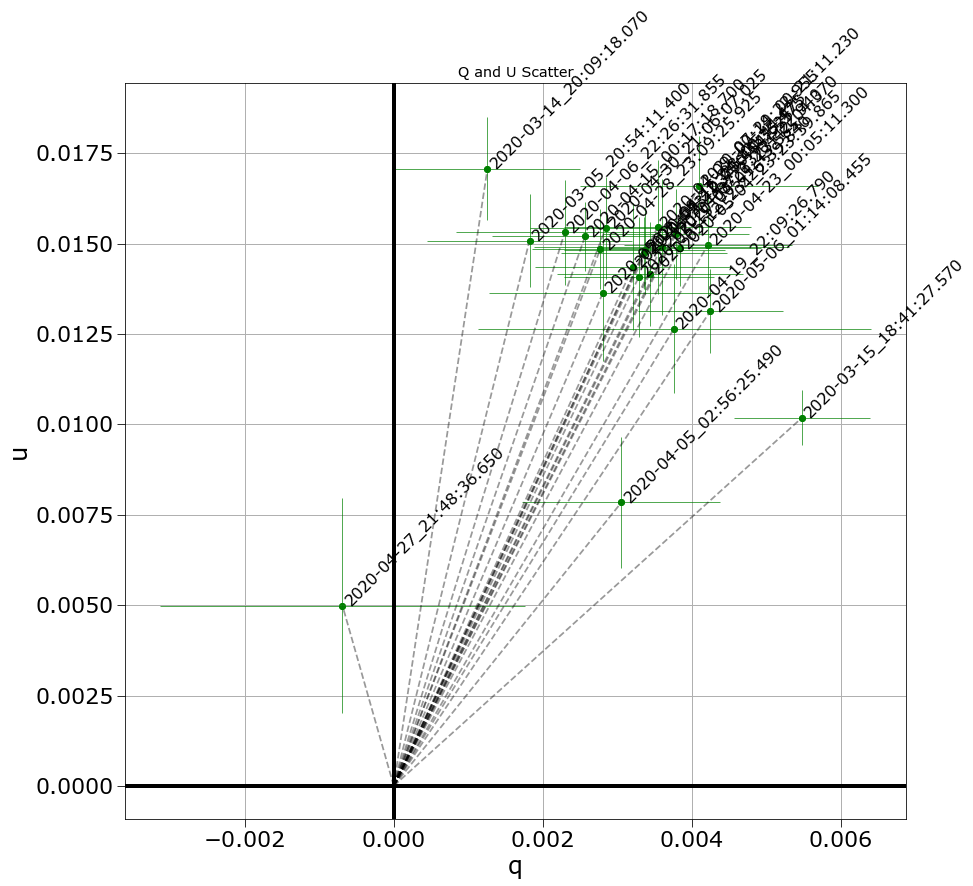

In [28]:
means = funcs_polarimetry.q_n_u_single_plot_v1(data_hd2158,
                                       plot_c='green',
                                       only_means=True,
                                       pol_deg=True)

In [41]:
data_bd64[0] = data_bd64[0] + data_hd2158[0]

ValueError: operands could not be broadcast together with shapes (7,) (23,) 

In [61]:
len(data_hd2158[0]), len(data_bd64[0])

(23, 7)

In [ ]:
#Write a Wrapper Function to do the joining.

In [51]:
data_bd64[0]= np.concatenate((data_bd64[0], data_hd2158[0]), axis=0)
data_bd64[1]= np.concatenate((data_bd64[1], data_hd2158[1]), axis=0)

In [69]:
len(data_g191[0])

7

In [70]:
len(data_bd64[0])

7

In [71]:
len(data_EECep[0])

41

In [134]:
len(cal_prod_EECep[0])

41

zero pol 7
high pol 23
target 41
41 41 41 41


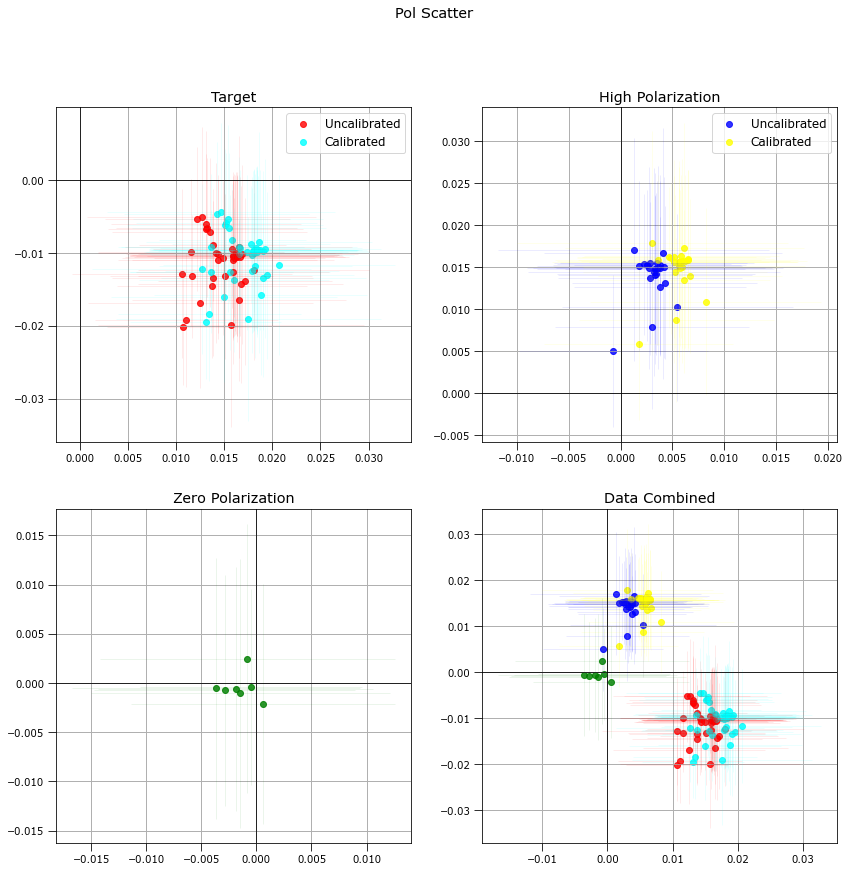

In [147]:
master_data = [data_g191, data_hd2158, data_EECep]

funcs_polarimetry.q_n_u_stack_plot_v2(master_data,
                                      [cal_prod_EECep, cal_prod_hd2158],
                                      key_verb=True)

In [124]:
len([])

0